# Library

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time
from numpy import concatenate
import numpy as np

import seaborn as sns
from scipy import stats

from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.layers import MaxPool1D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras import Sequential
from math import sqrt;
import tensorflow as tf

# Preprocessing

## Import data

In [2]:
# import data
url = "https://drive.google.com/file/d/1_LBzbPCrkDpksT37LZoIRs8NyeOocCyr/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, parse_dates = True,index_col=0)
df.head()

Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-11-01 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
2016-11-01 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2016-11-01 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
2016-11-01 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
2016-11-01 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

                        T3       RH_3         T4       RH_4  ...         T9  \
date                                                         ...              
2016-11-01 17:00:00  19.79  44.730000  19.000000  45.566667  ...  17.033333   
2016-11-01 17:10:00  19.79  44.790000  19.000000  45.992500  ...  17.066667   
2016-11-01 17:20:00  19.79  44.933333  18.926667  45.890000  ...  17.000000   
2016-11-01 17:30:00  19.79  45.000000  18.890000  45.723333  ...  17.000000   
2016-11-01 17:40:00  19.79  45.000000  18.890000  45.530000  ...  17.000000   

                      RH_9  T_out  Press_mm_hg  RH_out  Windspeed  Visibility  \
date                                                                            
2016-11-01 17:00:00  45.53   6.60        733.5    92.0   7.000000   63.000000   
2016-11-01 17:10:00  45.56   6.48        733.6    92.0   6.666667   59.166667   
2016-11-01 17:20:00  45.50   6.37        733.7    92.0   6.333333   55.333333   
2016-11-01 17:30:00  45.40   6.25        733.8    92.0   6.000000   51.500000   
2016-11-01 17:40:00  45.40   6.13        733.9    92.0   5.666667   47.666667   

                     Tdewpoint        rv1        rv2  
date                                                  
2016-11-01 17:00:00        5.3  13.275433  13.275433  
2016-11-01 17:10:00        5.2  18.606195  18.606195  
2016-11-01 17:20:00        5.1  28.642668  28.642668  
2016-11-01 17:30:00        5.0  45.410390  45.410390  
2016-11-01 17:40:00        4.9  10.084097  10.084097  

[5 rows x 28 columns]

In [3]:
df.shape

(19735, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-11-01 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [5]:
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.412580    755.522602   
std    ...      2.014712      4.151497      5.318464      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.670000    750.933333   
50%    ...     19.390000     40.900000      6.920000    756.100000   
75%    ...     20.600000     44.338095     10.400000    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760995     24.988033   
std       14.901088      2.451221     11.794719      4.195248     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.430000     24.897653   
75%       91.666667      5.500000     40.000000      6.570000     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [6]:
# Jumlah missing value
df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

<AxesSubplot:xlabel='date'>

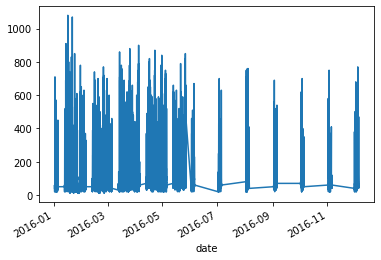

In [7]:
df['Appliances'].plot()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Appliances', ylabel='Density'>

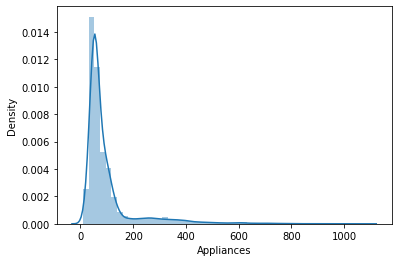

In [8]:
sns.distplot(df['Appliances'])

In [9]:
# Correlation matrix
df.corr()['Appliances']

Appliances     1.000000
lights         0.197278
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2          -0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6          -0.083178
T7             0.025801
RH_7          -0.055642
T8             0.039572
RH_8          -0.094039
T9             0.010010
RH_9          -0.051462
T_out          0.099155
Press_mm_hg   -0.034885
RH_out        -0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015357
rv1           -0.011145
rv2           -0.011145
Name: Appliances, dtype: float64

Feature Extraction (Skenario Atribut)

In [10]:
# Data 1
# All
df_new = df

# tanpa minus
# df_new = df.drop(df.columns[[5, 13, 15, 17, 19, 21, 22, 26, 27]], axis=1)

# 5 teratas
# df_new = df.drop(df.columns[[2, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27]], axis=1)

# 3 teratas
# df_new = df.drop(df.columns[[2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1)

# 1 teratas
# df_new = df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1)

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-11-01 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [12]:
values = df_new.values

In [13]:
values.shape

(19735, 28)

## Normalisasi

In [14]:
# MinMax
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
# Z-score
# scaled = stats.zscore(values, axis = 0)

#Z-Score
scaler = StandardScaler()
scaled = scaler.fit_transform(values)

## Convert to Time Series

In [15]:
#covert to time-series
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [16]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.046729   0.428571    0.32735   0.566187   0.225345   0.684038   
2   0.046729   0.428571    0.32735   0.541326   0.225345   0.682140   
3   0.037383   0.428571    0.32735   0.530502   0.225345   0.679445   
4   0.037383   0.571429    0.32735   0.524080   0.225345   0.678414   
5   0.046729   0.571429    0.32735   0.531419   0.225345   0.676727   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var19(t)  var20(t)  \
1   0.215188   0.746066   0.351351    0.764262  ...  0.226500  0.678532   
2   0.215188   0.748871   0.351351    0.782437  ...  0.219563  0.676049   
3   0.215188   0.755569   0.344745    0.778062  ...  0.219563  0.671909   
4   0.215188   0.758685   0.341441    0.770949  ...  0.219563  0.671909   
5   0.215188   0.758685   0.341441    0.762697  ...  0.219563  0.667357   

   var21(t)  var22(t)  var23(t)  var24(t)  var25(t)  var26(t)  var27(t)  \
1  0.369132  0.100000  0.894737  0.476190  0.894872  0.533937  0.372083   
2  0.365595  0.102326  0.894737  0.452381  0.835897  0.529412  0.572848   
3  0.361736  0.104651  0.894737  0.428571  0.776923  0.524887  0.908261   
4  0.357878  0.106977  0.894737  0.404762  0.717949  0.520362  0.201611   
5  0.354341  0.109302  0.894737  0.380952  0.658974  0.515837  0.898441   

   var28(t)  
1  0.372083  
2  0.572848  
3  0.908261  
4  0.201611  
5  0.898441  

[5 rows x 56 columns]

In [17]:
reframed.shape

(19734, 56)

In [18]:
# Data 1

# All
reframed.drop(reframed.columns[[x for x in range(29, 56)]], axis=1, inplace=True)

# no minus
# reframed.drop(reframed.columns[[x for x in range(20, 38)]], axis=1, inplace=True)

# Top 5
# reframed.drop(reframed.columns[[x for x in range(7, 12)]], axis=1, inplace=True)

# Top 3
# reframed.drop(reframed.columns[[x for x in range(5, 8)]], axis=1, inplace=True)

reframed.head()

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.046729   0.428571    0.32735   0.566187   0.225345   0.684038   
2   0.046729   0.428571    0.32735   0.541326   0.225345   0.682140   
3   0.037383   0.428571    0.32735   0.530502   0.225345   0.679445   
4   0.037383   0.571429    0.32735   0.524080   0.225345   0.678414   
5   0.046729   0.571429    0.32735   0.531419   0.225345   0.676727   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var20(t-1)  var21(t-1)  \
1   0.215188   0.746066   0.351351    0.764262  ...    0.677290    0.372990   
2   0.215188   0.748871   0.351351    0.782437  ...    0.678532    0.369132   
3   0.215188   0.755569   0.344745    0.778062  ...    0.676049    0.365595   
4   0.215188   0.758685   0.341441    0.770949  ...    0.671909    0.361736   
5   0.215188   0.758685   0.341441    0.762697  ...    0.671909    0.357878   

   var22(t-1)  var23(t-1)  var24(t-1)  var25(t-1)  var26(t-1)  var27(t-1)  \
1    0.097674    0.894737    0.500000    0.953846    0.538462    0.265449   
2    0.100000    0.894737    0.476190    0.894872    0.533937    0.372083   
3    0.102326    0.894737    0.452381    0.835897    0.529412    0.572848   
4    0.104651    0.894737    0.428571    0.776923    0.524887    0.908261   
5    0.106977    0.894737    0.404762    0.717949    0.520362    0.201611   

   var28(t-1)   var1(t)  
1    0.265449  0.046729  
2    0.372083  0.037383  
3    0.572848  0.037383  
4    0.908261  0.046729  
5    0.201611  0.037383  

[5 rows x 29 columns]

## Split data

In [ ]:
#split into train and test sets
values = reframed.values
# n_train = round(values.shape[0])

train = values[:, :]
test = values[:, :]

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshap input menjadi 3D ([)samples, timesteps, features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Model Building

### Random Search

In [ ]:
#design network CNN
model = Sequential()
model.add(Conv1D(filters=69, kernel_size=1, activation='sigmoid', input_shape=(train_X.shape[1], train_X.shape[2])))

model.add(MaxPool1D(pool_size=1))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(69, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(69, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(69, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(69, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(69, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(69, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mse', optimizer='rmsprop')

In [ ]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=74, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

Epoch 1/74
198/198 [==============================] - 3s 9ms/step - loss: 0.0230 - val_loss: 0.0092
Epoch 2/74
198/198 [==============================] - 1s 7ms/step - loss: 0.0099 - val_loss: 0.0093
Epoch 3/74
198/198 [==============================] - 2s 9ms/step - loss: 0.0098 - val_loss: 0.0093
Epoch 4/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0097 - val_loss: 0.0093
Epoch 5/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 6/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 7/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 8/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 9/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 10/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0095 - val_loss: 0.0093

### Grid Search

In [ ]:
#design network CNN
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))

model.add(MaxPool1D(pool_size=1))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mse', optimizer='rmsprop')

In [ ]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

Epoch 1/50
198/198 [==============================] - 2s 5ms/step - loss: 0.8118 - val_loss: 0.6832
Epoch 2/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6831 - val_loss: 0.6798
Epoch 3/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6812 - val_loss: 0.6795
Epoch 4/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6809 - val_loss: 0.6784
Epoch 5/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6797 - val_loss: 0.6787
Epoch 6/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6794 - val_loss: 0.6786
Epoch 7/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6799 - val_loss: 0.6791
Epoch 8/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6791 - val_loss: 0.6784
Epoch 9/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6778 - val_loss: 0.6786
Epoch 10/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6785 - val_loss: 0.6786

# Evaluasi

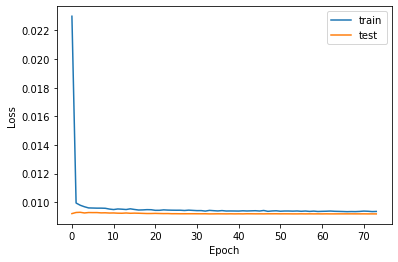

In [ ]:
#plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

In [ ]:
#membuat prediksi training
xhat = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

#invert scaling untuk peramalan
inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
inv_xhat = scaler.inverse_transform(inv_xhat)
inv_xhat = inv_xhat[:,0]

#invert scaling untuk aktual
train_y = train_y.reshape((len(train_y), 1))
inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#================================================================#

#membuat prediksi testing
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

#invert scaling untuk peramalan
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

#invert scaling untuk aktual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [ ]:
train_X.shape

(19734, 1)

In [ ]:
# calculate RMSE

np.seterr(divide='ignore', invalid='ignore')
def mean_absolute_percentage_error(yhat, test_y):
    yhat, test_y = np.array(yhat), np.array(test_y)
    return np.mean(np.abs((yhat, test_y) / test_y))

print('==============minmax===================')
print(f'MAPE test is : {(mape(test_y, yhat))}')
print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

print('==============zscore===================')
print(f'MAPE test is : {(mape(yhat, test_y))}')
print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

print('=======================================')
rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
print(f'RMSE Testing is : %.3f' % rmsetest)
rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

print(f'R2 test is : {r2_score(test_y, yhat)}')
print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

==============minmax===================
MAPE test is : 173928185933.4353
MAPE test invert is : 0.8010628540260903
==============zscore===================
MAPE test is : 0.6838573278209359
MAPE test invert is : 0.6158850533577799
RMSE Testing is : 0.096
RMSE Testing invert is : 102.566
R2 test is : -0.0008035810179010117
R2 test invert is : -0.0008035810179007896


Actual : [[0.04672897]
 [0.03738318]
 [0.03738318]
 ...
 [0.24299065]
 [0.38317757]
 [0.39252336]]
Predicted: [[0.08468042]
 [0.08468042]
 [0.08468041]
 ...
 [0.08468049]
 [0.08468079]
 [0.08468102]]


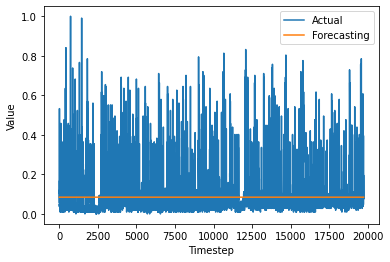

In [ ]:
print('Actual :', test_y)
print('Predicted:', yhat)
# plot history
pyplot.plot(test_y, label='Actual')
pyplot.plot(yhat, label='Forecasting')
pyplot.xlabel('Timestep')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()

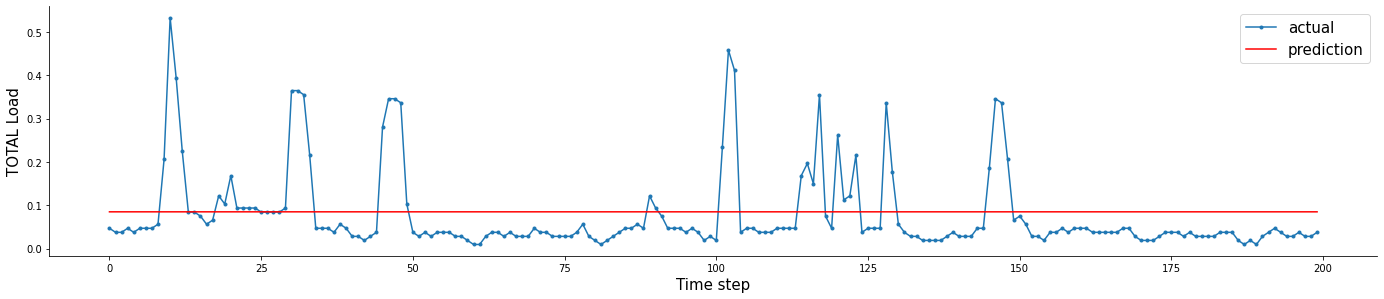

In [ ]:
idx = 200#int(len(yhat))
aa=[x for x in range(idx)]
pyplot.figure(figsize=(20,4))
pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
pyplot.tight_layout()
sns.despine(top=True)
pyplot.subplots_adjust(left=0.07)
pyplot.ylabel('TOTAL Load', size=15)
pyplot.xlabel('Time step', size=15)
pyplot.legend(fontsize=15)
pyplot.show()

# 5 run random

## tanh zscore

Epoch 1/74
198/198 [==============================] - 6s 10ms/step - loss: 0.7342 - val_loss: 0.6783
Epoch 2/74
198/198 [==============================] - 1s 7ms/step - loss: 0.6801 - val_loss: 0.6781
Epoch 3/74
198/198 [==============================] - 1s 7ms/step - loss: 0.6788 - val_loss: 0.6783
Epoch 4/74
198/198 [==============================] - 1s 8ms/step - loss: 0.6801 - val_loss: 0.6794
Epoch 5/74
198/198 [==============================] - 1s 7ms/step - loss: 0.6803 - val_loss: 0.6804
Epoch 6/74
198/198 [==============================] - 2s 9ms/step - loss: 0.6783 - val_loss: 0.6798
Epoch 7/74
198/198 [==============================] - 2s 12ms/step - loss: 0.6801 - val_loss: 0.6786
Epoch 8/74
198/198 [==============================] - 2s 8ms/step - loss: 0.6796 - val_loss: 0.6799
Epoch 9/74
198/198 [==============================] - 2s 8ms/step - loss: 0.6797 - val_loss: 0.6784
Epoch 10/74
198/198 [==============================] - 2s 8ms/step - loss: 0.6791 - val_loss: 0.67

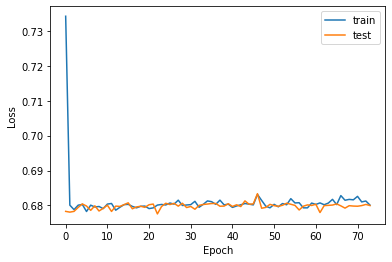

==============minmax===================
MAPE test is : 1.5355168595195954
MAPE test invert is : 0.7695515659912378
==============zscore===================
MAPE test is : 1165955986365454.0
MAPE test invert is : 0.4614460608703507
RMSE Testing is : 0.825
RMSE Testing invert is : 84.541
R2 test is : 0.3200439695532874
R2 test invert is : 0.3200439695532876


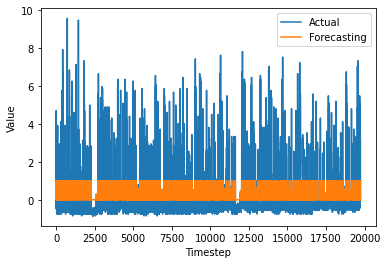

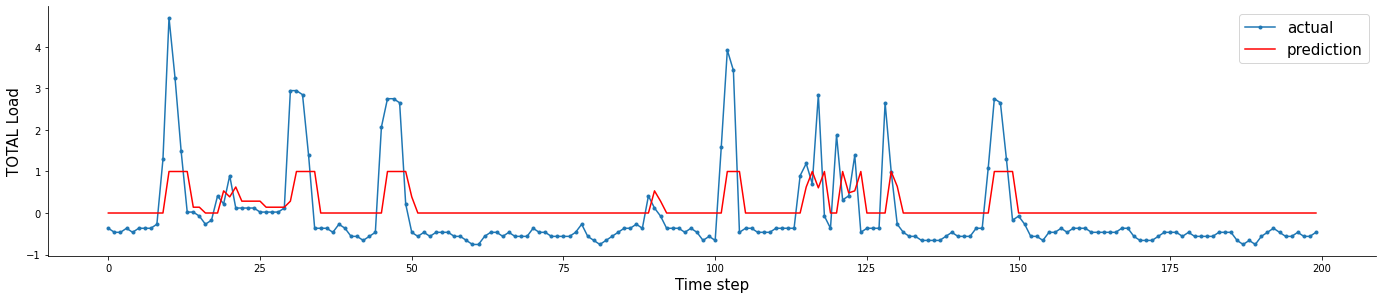

Epoch 1/74
198/198 [==============================] - 5s 8ms/step - loss: 0.7194 - val_loss: 0.6786
Epoch 2/74
198/198 [==============================] - 1s 7ms/step - loss: 0.6809 - val_loss: 0.6783
Epoch 3/74
198/198 [==============================] - 1s 7ms/step - loss: 0.6796 - val_loss: 0.6787
Epoch 4/74
198/198 [==============================] - 1s 8ms/step - loss: 0.6796 - val_loss: 0.6798
Epoch 5/74
198/198 [==============================] - 1s 7ms/step - loss: 0.6795 - val_loss: 0.6787
Epoch 6/74
198/198 [==============================] - 2s 8ms/step - loss: 0.6797 - val_loss: 0.6796
Epoch 7/74
198/198 [==============================] - 3s 14ms/step - loss: 0.6792 - val_loss: 0.6788
Epoch 8/74
198/198 [==============================] - 2s 10ms/step - loss: 0.6789 - val_loss: 0.6799
Epoch 9/74
198/198 [==============================] - 2s 9ms/step - loss: 0.6794 - val_loss: 0.6794
Epoch 10/74
198/198 [==============================] - 2s 8ms/step - loss: 0.6791 - val_loss: 0.67

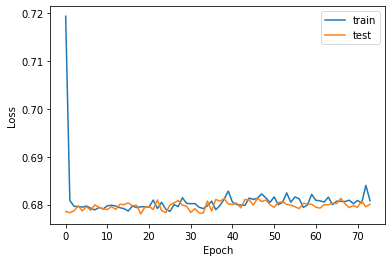

==============minmax===================
MAPE test is : 1.678370880528068
MAPE test invert is : 0.7795388201982845
==============zscore===================
MAPE test is : 868621405874745.0
MAPE test invert is : 0.4634343819776396
RMSE Testing is : 0.825
RMSE Testing invert is : 84.547
R2 test is : 0.3199506184523717
R2 test invert is : 0.31995061845237194


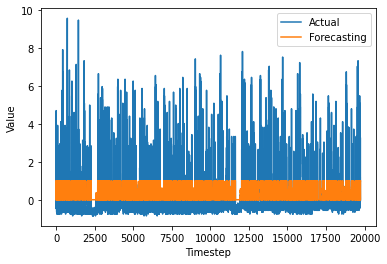

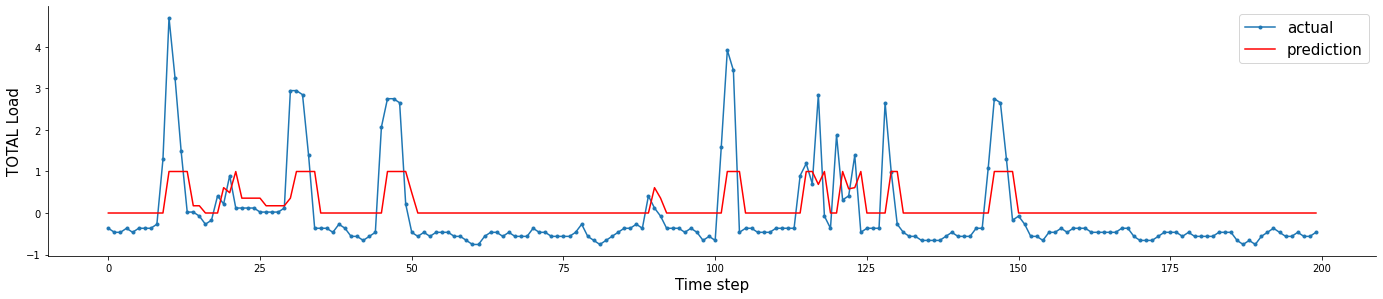

Epoch 1/74
198/198 [==============================] - 5s 10ms/step - loss: 0.7287 - val_loss: 0.6785
Epoch 2/74
198/198 [==============================] - 2s 10ms/step - loss: 0.6802 - val_loss: 0.6787
Epoch 3/74
198/198 [==============================] - 2s 9ms/step - loss: 0.6793 - val_loss: 0.6786
Epoch 4/74
198/198 [==============================] - 1s 7ms/step - loss: 0.6807 - val_loss: 0.6796
Epoch 5/74
198/198 [==============================] - 2s 8ms/step - loss: 0.6798 - val_loss: 0.6787
Epoch 6/74
198/198 [==============================] - 1s 7ms/step - loss: 0.6791 - val_loss: 0.6799
Epoch 7/74
198/198 [==============================] - 2s 11ms/step - loss: 0.6801 - val_loss: 0.6798
Epoch 8/74
198/198 [==============================] - 2s 10ms/step - loss: 0.6799 - val_loss: 0.6801
Epoch 9/74
198/198 [==============================] - 1s 7ms/step - loss: 0.6799 - val_loss: 0.6814
Epoch 10/74
198/198 [==============================] - 2s 9ms/step - loss: 0.6805 - val_loss: 0.

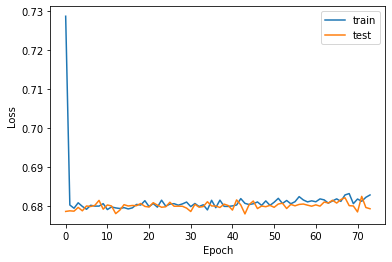

==============minmax===================
MAPE test is : 1.662786329731277
MAPE test invert is : 0.7779715425885368
==============zscore===================
MAPE test is : 1162229780085084.0
MAPE test invert is : 0.4631004779646241
RMSE Testing is : 0.824
RMSE Testing invert is : 84.493
R2 test is : 0.3208136159345665
R2 test invert is : 0.3208136159345667


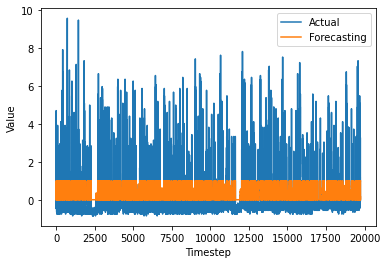

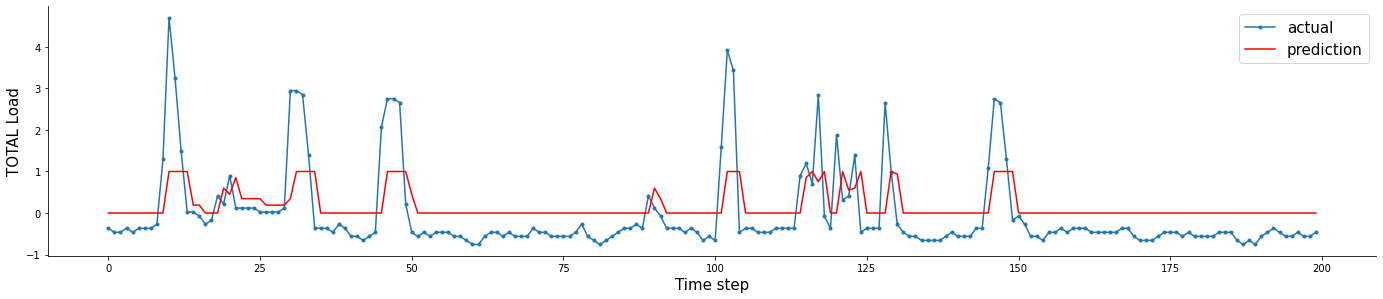

Epoch 1/74
198/198 [==============================] - 8s 15ms/step - loss: 0.7134 - val_loss: 0.6797
Epoch 2/74
198/198 [==============================] - 2s 10ms/step - loss: 0.6806 - val_loss: 0.6789
Epoch 3/74
198/198 [==============================] - 2s 10ms/step - loss: 0.6801 - val_loss: 0.6792
Epoch 4/74
198/198 [==============================] - 2s 10ms/step - loss: 0.6799 - val_loss: 0.6801
Epoch 5/74
198/198 [==============================] - 2s 8ms/step - loss: 0.6800 - val_loss: 0.6794
Epoch 6/74
198/198 [==============================] - 2s 9ms/step - loss: 0.6797 - val_loss: 0.6800
Epoch 7/74
198/198 [==============================] - 2s 12ms/step - loss: 0.6798 - val_loss: 0.6794
Epoch 8/74
198/198 [==============================] - 2s 10ms/step - loss: 0.6798 - val_loss: 0.6803
Epoch 9/74
198/198 [==============================] - 2s 10ms/step - loss: 0.6797 - val_loss: 0.6798
Epoch 10/74
198/198 [==============================] - 2s 11ms/step - loss: 0.6796 - val_loss

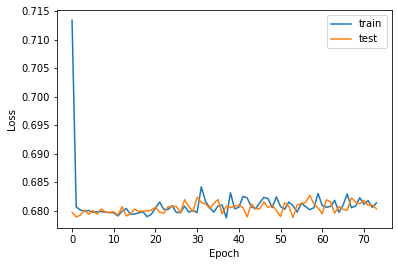

==============minmax===================
MAPE test is : 1.577863049112954
MAPE test invert is : 0.772610615130045
==============zscore===================
MAPE test is : 1374759123108638.0
MAPE test invert is : 0.46254864723394373
RMSE Testing is : 0.825
RMSE Testing invert is : 84.563
R2 test is : 0.31969385495030367
R2 test invert is : 0.3196938549503038


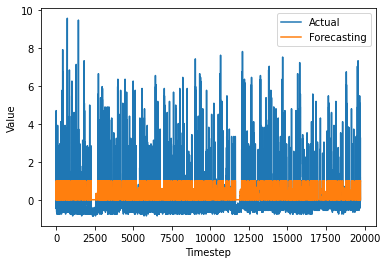

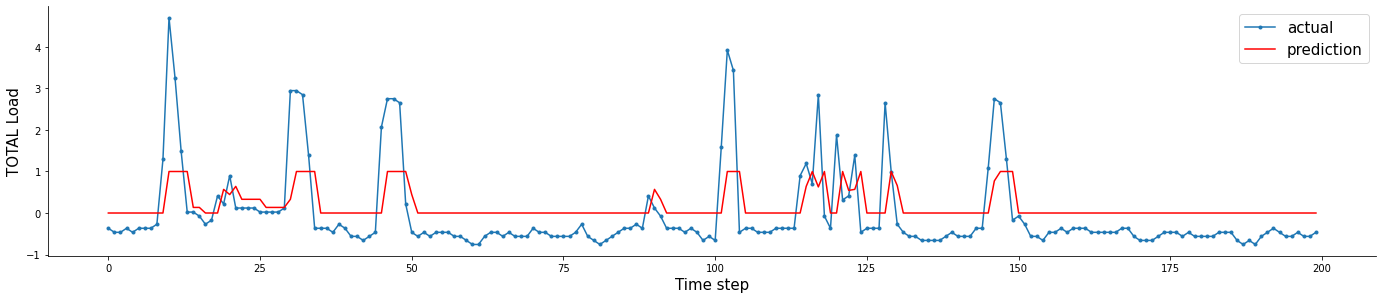

Epoch 1/74
198/198 [==============================] - 5s 12ms/step - loss: 0.7244 - val_loss: 0.6799
Epoch 2/74
198/198 [==============================] - 2s 10ms/step - loss: 0.6796 - val_loss: 0.6780
Epoch 3/74
198/198 [==============================] - 2s 8ms/step - loss: 0.6798 - val_loss: 0.6789
Epoch 4/74
198/198 [==============================] - 2s 9ms/step - loss: 0.6799 - val_loss: 0.6789
Epoch 5/74
198/198 [==============================] - 2s 11ms/step - loss: 0.6793 - val_loss: 0.6789
Epoch 6/74
198/198 [==============================] - 2s 8ms/step - loss: 0.6797 - val_loss: 0.6795
Epoch 7/74
198/198 [==============================] - 2s 11ms/step - loss: 0.6798 - val_loss: 0.6792
Epoch 8/74
198/198 [==============================] - 2s 13ms/step - loss: 0.6804 - val_loss: 0.6797
Epoch 9/74
198/198 [==============================] - 2s 11ms/step - loss: 0.6791 - val_loss: 0.6795
Epoch 10/74
198/198 [==============================] - 2s 10ms/step - loss: 0.6794 - val_loss:

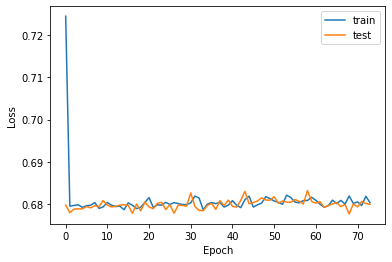

==============minmax===================
MAPE test is : 1.4897702706885227
MAPE test invert is : 0.7672246698012827
==============zscore===================
MAPE test is : 497220205284598.8
MAPE test invert is : 0.4606662426534306
RMSE Testing is : 0.825
RMSE Testing invert is : 84.542
R2 test is : 0.3200233256889281
R2 test invert is : 0.32002332568892833


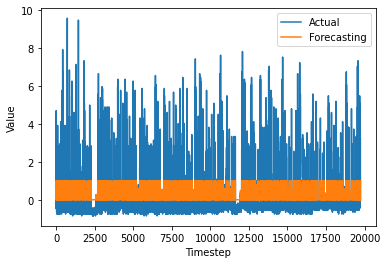

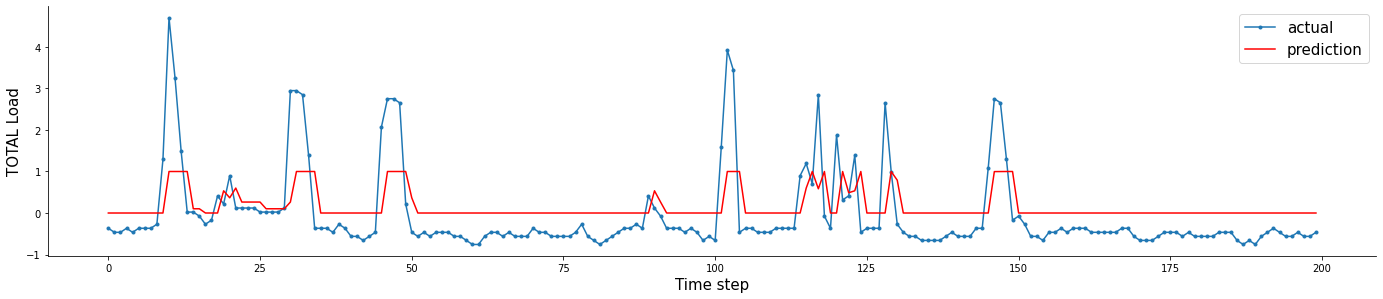

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto5
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

  #design network CNN
  model = Sequential()
  model.add(Conv1D(filters=69, kernel_size=1, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))

  model.add(MaxPool1D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(69, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=74, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto5") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  # xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  # yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto5")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto5")

## tanh minmax

mkdir: cannot create directory ‘foto6’: File exists
Epoch 1/74
198/198 [==============================] - 3s 7ms/step - loss: 0.0154 - val_loss: 0.0136
Epoch 2/74
198/198 [==============================] - 1s 5ms/step - loss: 0.0076 - val_loss: 0.0078
Epoch 3/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0064 - val_loss: 0.0066
Epoch 4/74
198/198 [==============================] - 1s 5ms/step - loss: 0.0059 - val_loss: 0.0062
Epoch 5/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0057 - val_loss: 0.0094
Epoch 6/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0055 - val_loss: 0.0105
Epoch 7/74
198/198 [==============================] - 1s 5ms/step - loss: 0.0054 - val_loss: 0.0072
Epoch 8/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0053 - val_loss: 0.0103
Epoch 9/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0053 - val_loss: 0.0099
Epoch 10/74
198/198 [===========================

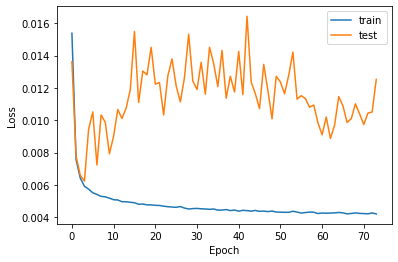

==============minmax===================
MAPE test is : 282131190350.61566
MAPE test invert is : 1.8568845812745802
==============zscore===================
MAPE test is : 0.6445322863951719
MAPE test invert is : 0.6082966005192764
RMSE Testing is : 0.112
RMSE Testing invert is : 119.749
R2 test is : -0.36422391744033256
R2 test invert is : -0.3642239174403328


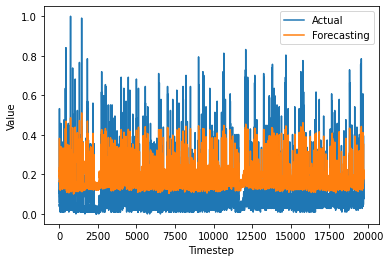

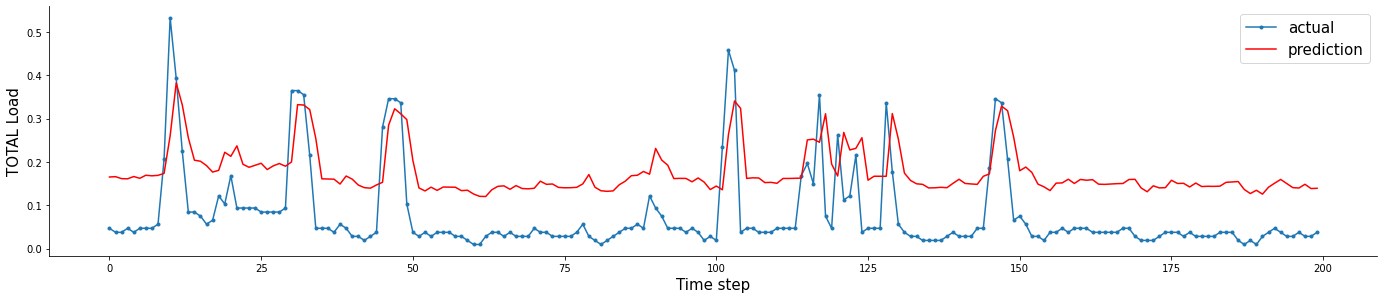

Epoch 1/74
198/198 [==============================] - 3s 7ms/step - loss: 0.0156 - val_loss: 0.0156
Epoch 2/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0087 - val_loss: 0.0073
Epoch 3/74
198/198 [==============================] - 1s 7ms/step - loss: 0.0069 - val_loss: 0.0067
Epoch 4/74
198/198 [==============================] - 1s 7ms/step - loss: 0.0062 - val_loss: 0.0057
Epoch 5/74
198/198 [==============================] - 1s 5ms/step - loss: 0.0057 - val_loss: 0.0065
Epoch 6/74
198/198 [==============================] - 1s 5ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 7/74
198/198 [==============================] - 1s 5ms/step - loss: 0.0054 - val_loss: 0.0056
Epoch 8/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 9/74
198/198 [==============================] - 1s 5ms/step - loss: 0.0051 - val_loss: 0.0053
Epoch 10/74
198/198 [==============================] - 1s 5ms/step - loss: 0.0051 - val_loss: 0.0065

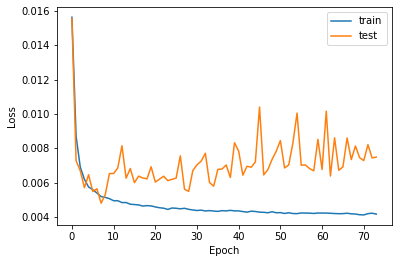

==============minmax===================
MAPE test is : 207569352076.95587
MAPE test invert is : 1.286000654930827
==============zscore===================
MAPE test is : 0.5800034438474961
MAPE test invert is : 0.538929790897875
RMSE Testing is : 0.087
RMSE Testing invert is : 92.592
R2 test is : 0.18437995407413887
R2 test invert is : 0.18437995407413876


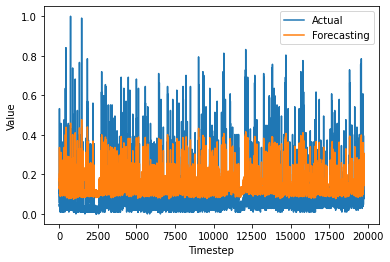

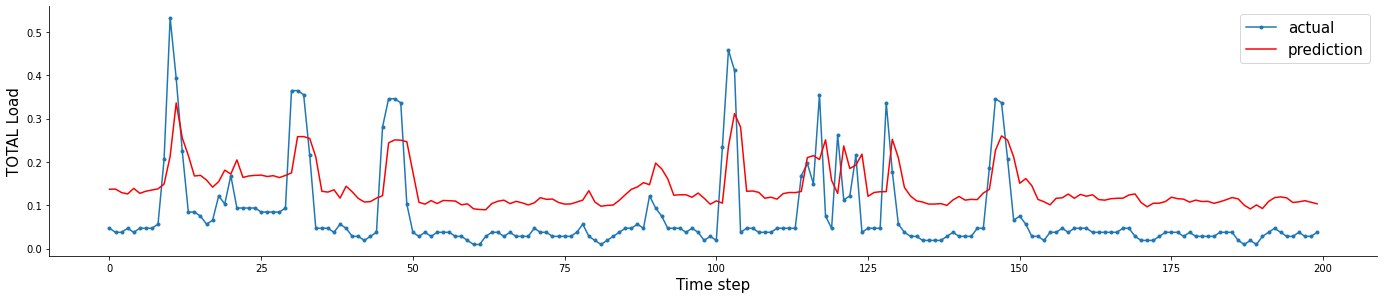

Epoch 1/74
198/198 [==============================] - 3s 6ms/step - loss: 0.0125 - val_loss: 0.0138
Epoch 2/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0079 - val_loss: 0.0118
Epoch 3/74
198/198 [==============================] - 1s 5ms/step - loss: 0.0065 - val_loss: 0.0089
Epoch 4/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0060 - val_loss: 0.0077
Epoch 5/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0057 - val_loss: 0.0127
Epoch 6/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0055 - val_loss: 0.0112
Epoch 7/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0053 - val_loss: 0.0115
Epoch 8/74
198/198 [==============================] - 1s 5ms/step - loss: 0.0052 - val_loss: 0.0088
Epoch 9/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0052 - val_loss: 0.0101
Epoch 10/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0050 - val_loss: 0.0091

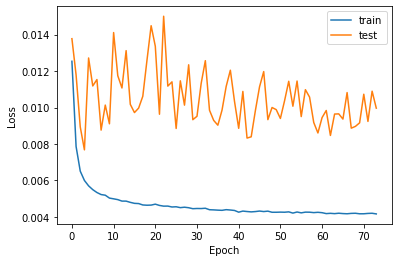

==============minmax===================
MAPE test is : 245568307833.04395
MAPE test invert is : 1.5997187573855882
==============zscore===================
MAPE test is : 0.6192954964300934
MAPE test invert is : 0.5809175115841975
RMSE Testing is : 0.100
RMSE Testing invert is : 106.809
R2 test is : -0.0853180872285324
R2 test invert is : -0.08531808722853262


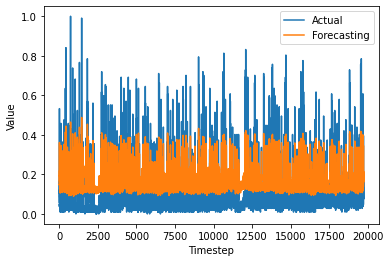

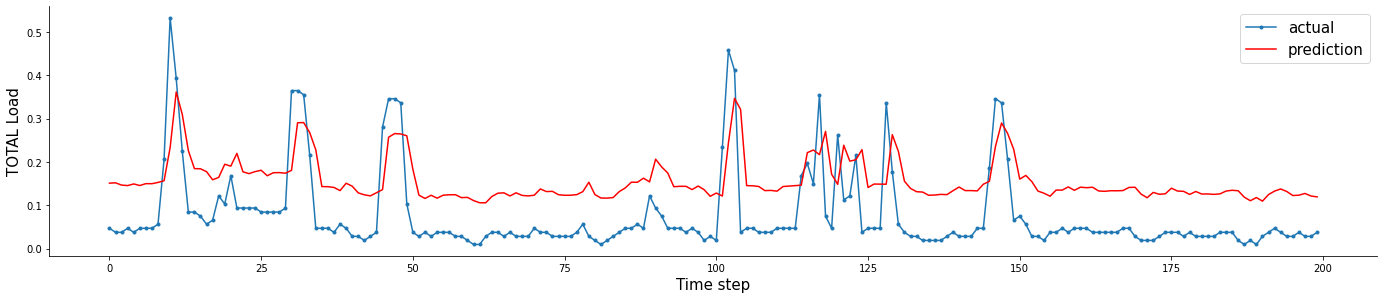

Epoch 1/74
198/198 [==============================] - 3s 7ms/step - loss: 0.0134 - val_loss: 0.0155
Epoch 2/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0086 - val_loss: 0.0098
Epoch 3/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0070 - val_loss: 0.0106
Epoch 4/74
198/198 [==============================] - 1s 5ms/step - loss: 0.0062 - val_loss: 0.0130
Epoch 5/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0059 - val_loss: 0.0117
Epoch 6/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0056 - val_loss: 0.0141
Epoch 7/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0055 - val_loss: 0.0128
Epoch 8/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0053 - val_loss: 0.0132
Epoch 9/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0052 - val_loss: 0.0111
Epoch 10/74
198/198 [==============================] - 2s 9ms/step - loss: 0.0051 - val_loss: 0.0107

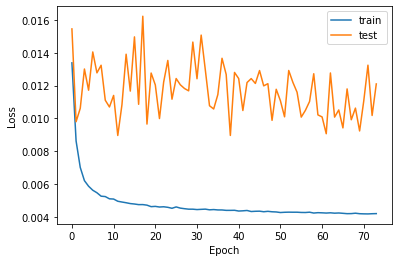

==============minmax===================
MAPE test is : 279976901957.61865
MAPE test invert is : 1.8191171526530254
==============zscore===================
MAPE test is : 0.6408929520367622
MAPE test invert is : 0.6043610077636178
RMSE Testing is : 0.110
RMSE Testing invert is : 117.725
R2 test is : -0.3185075235140953
R2 test invert is : -0.3185075235140955


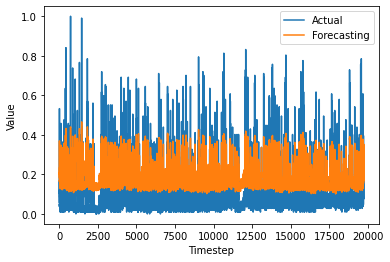

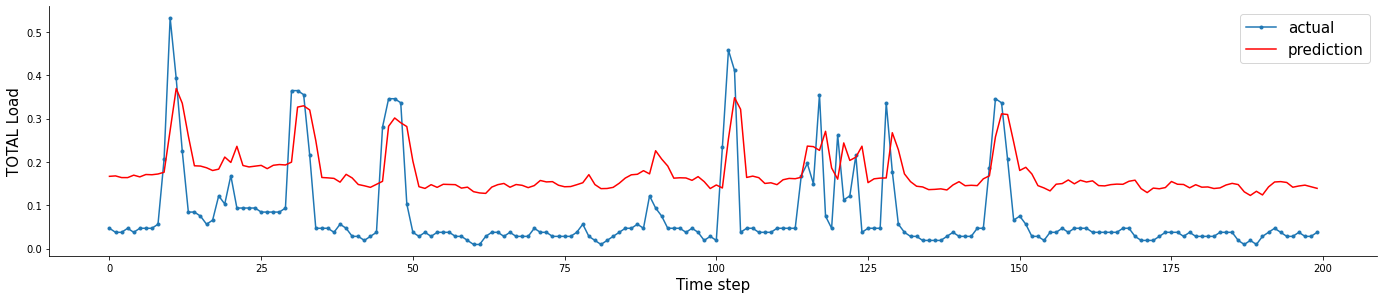

Epoch 1/74
198/198 [==============================] - 3s 7ms/step - loss: 0.0136 - val_loss: 0.0102
Epoch 2/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0080 - val_loss: 0.0074
Epoch 3/74
198/198 [==============================] - 2s 9ms/step - loss: 0.0066 - val_loss: 0.0085
Epoch 4/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0060 - val_loss: 0.0097
Epoch 5/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0057 - val_loss: 0.0117
Epoch 6/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0055 - val_loss: 0.0103
Epoch 7/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0053 - val_loss: 0.0091
Epoch 8/74
198/198 [==============================] - 1s 5ms/step - loss: 0.0052 - val_loss: 0.0109
Epoch 9/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0051 - val_loss: 0.0119
Epoch 10/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0050 - val_loss: 0.0126

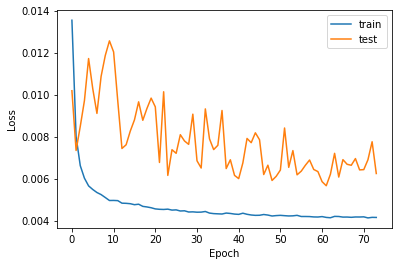

==============minmax===================
MAPE test is : 181481780994.31033
MAPE test invert is : 1.0888471023783115
==============zscore===================
MAPE test is : 0.5448435102752919
MAPE test invert is : 0.5023757138588953
RMSE Testing is : 0.079
RMSE Testing invert is : 84.624
R2 test is : 0.31871386520875555
R2 test invert is : 0.31871386520875544


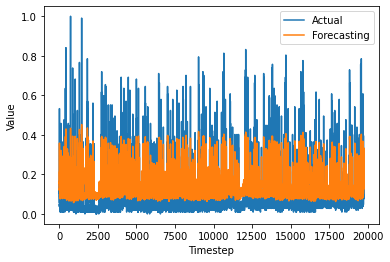

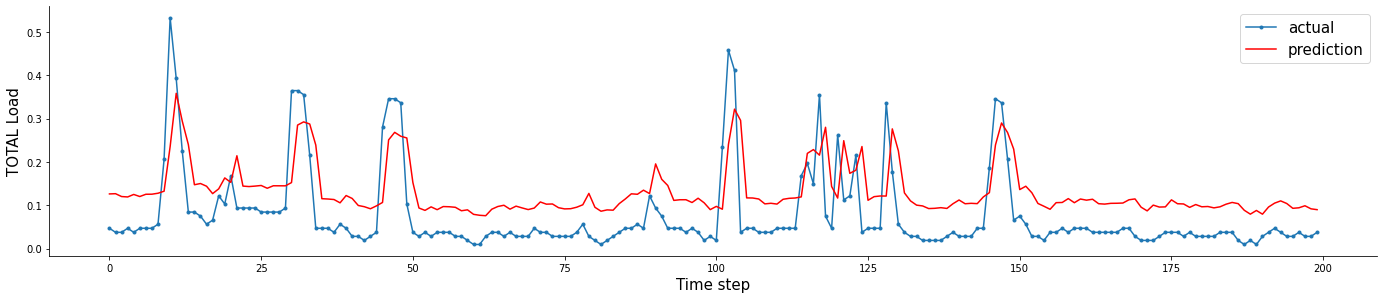

In [21]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto6
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network CNN
  model = Sequential()
  model.add(Conv1D(filters=69, kernel_size=1, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))

  model.add(MaxPool1D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(69, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=74, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto6") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  # xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  # yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto6")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto6")

## sig zscore

mkdir: cannot create directory ‘foto8’: File exists
Epoch 1/74
198/198 [==============================] - 38s 9ms/step - loss: 1.0116 - val_loss: 1.0001
Epoch 2/74
198/198 [==============================] - 2s 9ms/step - loss: 1.0002 - val_loss: 1.0000
Epoch 3/74
198/198 [==============================] - 3s 13ms/step - loss: 1.0001 - val_loss: 1.0000
Epoch 4/74
198/198 [==============================] - 2s 9ms/step - loss: 1.0001 - val_loss: 1.0000
Epoch 5/74
198/198 [==============================] - 2s 9ms/step - loss: 1.0001 - val_loss: 1.0000
Epoch 6/74
198/198 [==============================] - 2s 9ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 7/74
198/198 [==============================] - 2s 9ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 8/74
198/198 [==============================] - 2s 9ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 9/74
198/198 [==============================] - 3s 14ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 10/74
198/198 [========================

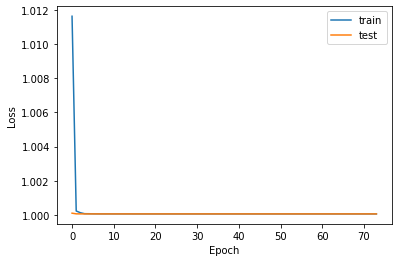

==============minmax===================
MAPE test is : 0.9999999984983038
MAPE test invert is : 0.7636200889771653
==============zscore===================
MAPE test is : 108969481.57593292
MAPE test invert is : 0.6195642021573743
RMSE Testing is : 1.000
RMSE Testing invert is : 102.525
R2 test is : -3.464617481796495e-10
R2 test invert is : -3.464617481796495e-10


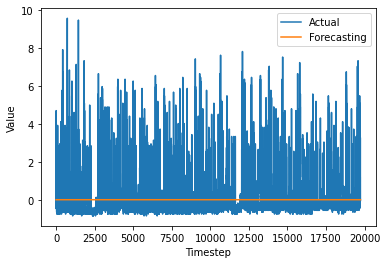

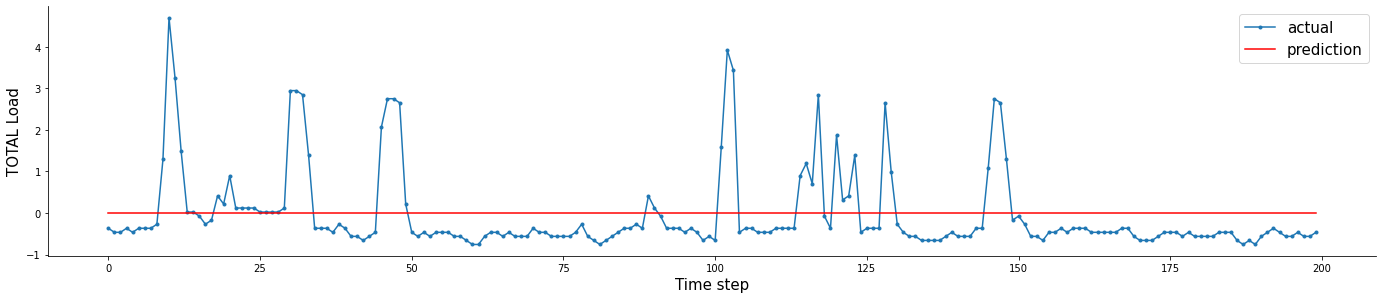

Epoch 1/74
198/198 [==============================] - 5s 11ms/step - loss: 1.0144 - val_loss: 1.0001
Epoch 2/74
198/198 [==============================] - 2s 9ms/step - loss: 1.0003 - val_loss: 1.0001
Epoch 3/74
198/198 [==============================] - 3s 14ms/step - loss: 1.0001 - val_loss: 1.0000
Epoch 4/74
198/198 [==============================] - 2s 9ms/step - loss: 1.0001 - val_loss: 1.0000
Epoch 5/74
198/198 [==============================] - 2s 8ms/step - loss: 1.0001 - val_loss: 1.0000
Epoch 6/74
198/198 [==============================] - 2s 10ms/step - loss: 1.0001 - val_loss: 1.0000
Epoch 7/74
198/198 [==============================] - 1s 7ms/step - loss: 1.0001 - val_loss: 1.0000
Epoch 8/74
198/198 [==============================] - 2s 10ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 9/74
198/198 [==============================] - 2s 12ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 10/74
198/198 [==============================] - 2s 9ms/step - loss: 1.0000 - val_loss: 1

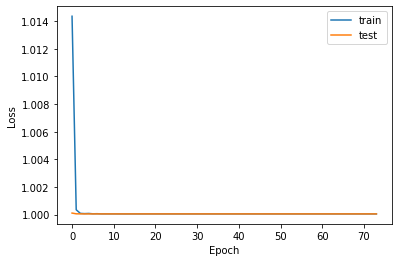

==============minmax===================
MAPE test is : 0.999999998652531
MAPE test invert is : 0.7636200882559631
==============zscore===================
MAPE test is : 121438932.87063757
MAPE test invert is : 0.6195642022436461
RMSE Testing is : 1.000
RMSE Testing invert is : 102.525
R2 test is : -3.46557893493582e-10
R2 test invert is : -3.465576714489771e-10


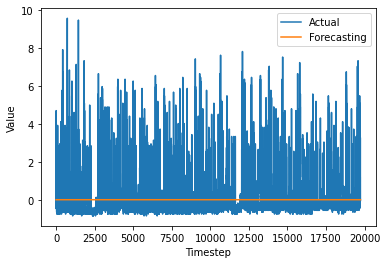

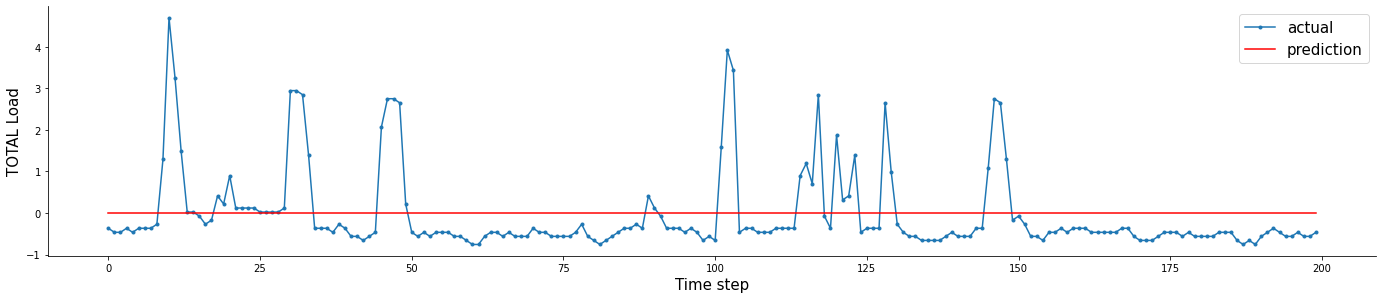

Epoch 1/74
198/198 [==============================] - 5s 13ms/step - loss: 1.0109 - val_loss: 1.0001
Epoch 2/74
198/198 [==============================] - 2s 11ms/step - loss: 1.0003 - val_loss: 1.0000
Epoch 3/74
198/198 [==============================] - 2s 9ms/step - loss: 1.0001 - val_loss: 1.0000
Epoch 4/74
198/198 [==============================] - 2s 9ms/step - loss: 1.0001 - val_loss: 1.0000
Epoch 5/74
198/198 [==============================] - 2s 8ms/step - loss: 1.0001 - val_loss: 1.0000
Epoch 6/74
198/198 [==============================] - 2s 8ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 7/74
198/198 [==============================] - 2s 9ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 8/74
198/198 [==============================] - 2s 8ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 9/74
198/198 [==============================] - 2s 11ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 10/74
198/198 [==============================] - 1s 7ms/step - loss: 1.0000 - val_loss: 1.0

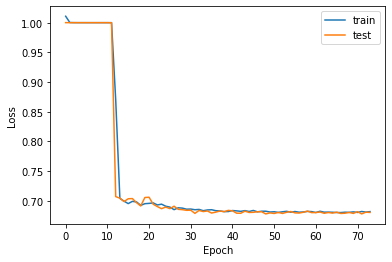

==============minmax===================
MAPE test is : 1.3817841743618724
MAPE test invert is : 0.7617705090244221
==============zscore===================
MAPE test is : 27971.02309110216
MAPE test invert is : 0.4585252312793516
RMSE Testing is : 0.825
RMSE Testing invert is : 84.560
R2 test is : 0.31973851700365674
R2 test invert is : 0.31973851700365674


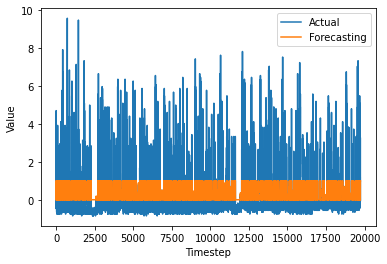

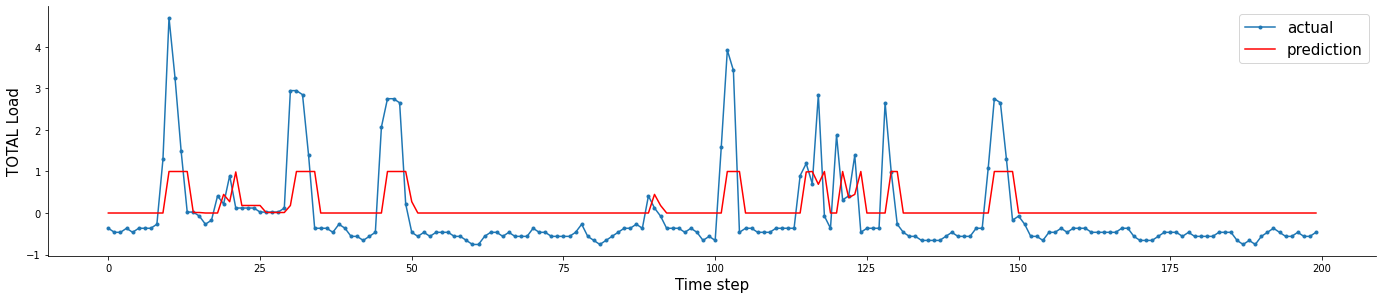

Epoch 1/74
198/198 [==============================] - 4s 9ms/step - loss: 1.0053 - val_loss: 1.0001
Epoch 2/74
198/198 [==============================] - 1s 7ms/step - loss: 1.0002 - val_loss: 1.0000
Epoch 3/74
198/198 [==============================] - 2s 9ms/step - loss: 1.0001 - val_loss: 1.0000
Epoch 4/74
198/198 [==============================] - 2s 9ms/step - loss: 1.0001 - val_loss: 1.0000
Epoch 5/74
198/198 [==============================] - 2s 12ms/step - loss: 0.9342 - val_loss: 0.7362
Epoch 6/74
198/198 [==============================] - 2s 8ms/step - loss: 0.7102 - val_loss: 0.6925
Epoch 7/74
198/198 [==============================] - 1s 7ms/step - loss: 0.6950 - val_loss: 0.6976
Epoch 8/74
198/198 [==============================] - 1s 7ms/step - loss: 0.6992 - val_loss: 0.6928
Epoch 9/74
198/198 [==============================] - 2s 10ms/step - loss: 0.6985 - val_loss: 0.6976
Epoch 10/74
198/198 [==============================] - 2s 9ms/step - loss: 0.6980 - val_loss: 0.69

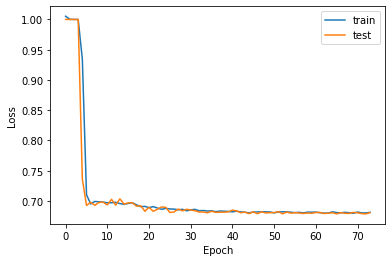

==============minmax===================
MAPE test is : 1.3708144916385938
MAPE test invert is : 0.7608840766930647
==============zscore===================
MAPE test is : 28071.94404894908
MAPE test invert is : 0.4586144776692629
RMSE Testing is : 0.825
RMSE Testing invert is : 84.587
R2 test is : 0.3192989378514558
R2 test invert is : 0.3192989378514559


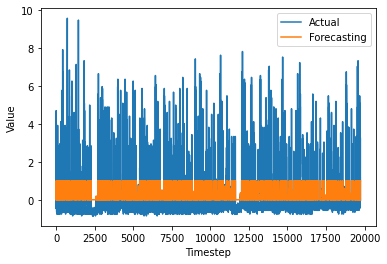

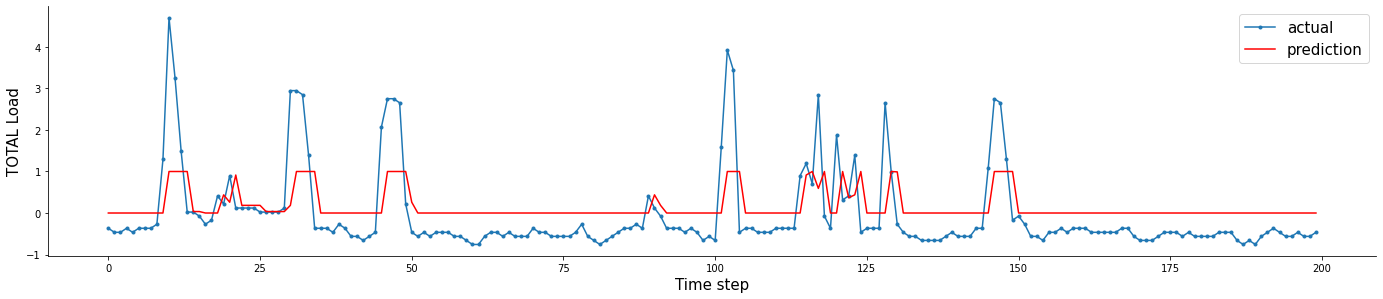

Epoch 1/74
198/198 [==============================] - 4s 10ms/step - loss: 1.0240 - val_loss: 1.0001
Epoch 2/74
198/198 [==============================] - 2s 10ms/step - loss: 1.0003 - val_loss: 1.0001
Epoch 3/74
198/198 [==============================] - 2s 10ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 4/74
198/198 [==============================] - 1s 7ms/step - loss: 1.0001 - val_loss: 1.0000
Epoch 5/74
198/198 [==============================] - 2s 9ms/step - loss: 1.0001 - val_loss: 1.0000
Epoch 6/74
198/198 [==============================] - 1s 7ms/step - loss: 1.0001 - val_loss: 1.0000
Epoch 7/74
198/198 [==============================] - 2s 8ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 8/74
198/198 [==============================] - 1s 8ms/step - loss: 1.0001 - val_loss: 1.0000
Epoch 9/74
198/198 [==============================] - 2s 12ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 10/74
198/198 [==============================] - 2s 9ms/step - loss: 1.0000 - val_loss: 1.

KeyboardInterrupt: ignored

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto8
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network CNN
  model = Sequential()
  model.add(Conv1D(filters=69, kernel_size=1, activation='sigmoid', input_shape=(train_X.shape[1], train_X.shape[2])))

  model.add(MaxPool1D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(69, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=74, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto8") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  # xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  # yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto8")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto8")

## sig minmax

Epoch 1/74
198/198 [==============================] - 4s 9ms/step - loss: 0.0165 - val_loss: 0.0094
Epoch 2/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0100 - val_loss: 0.0094
Epoch 3/74
198/198 [==============================] - 1s 7ms/step - loss: 0.0098 - val_loss: 0.0094
Epoch 4/74
198/198 [==============================] - 1s 7ms/step - loss: 0.0097 - val_loss: 0.0094
Epoch 5/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 6/74
198/198 [==============================] - 2s 11ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 7/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 8/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 9/74
198/198 [==============================] - 1s 7ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 10/74
198/198 [==============================] - 1s 6ms/step - loss: 0.0095 - val_loss: 0.009

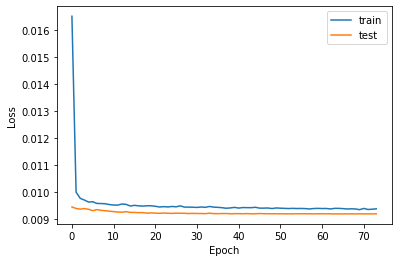

==============minmax===================
MAPE test is : 175524940930.48196
MAPE test invert is : 0.8124070842575974
==============zscore===================
MAPE test is : 0.6828297925887007
MAPE test invert is : 0.6155162579982402
RMSE Testing is : 0.096
RMSE Testing invert is : 102.593
R2 test is : -0.0013292058794429629
R2 test invert is : -0.0013292058794429629


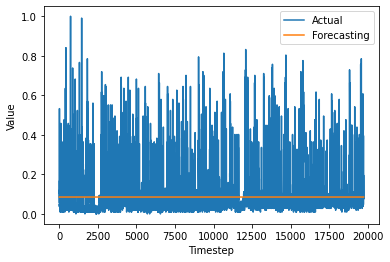

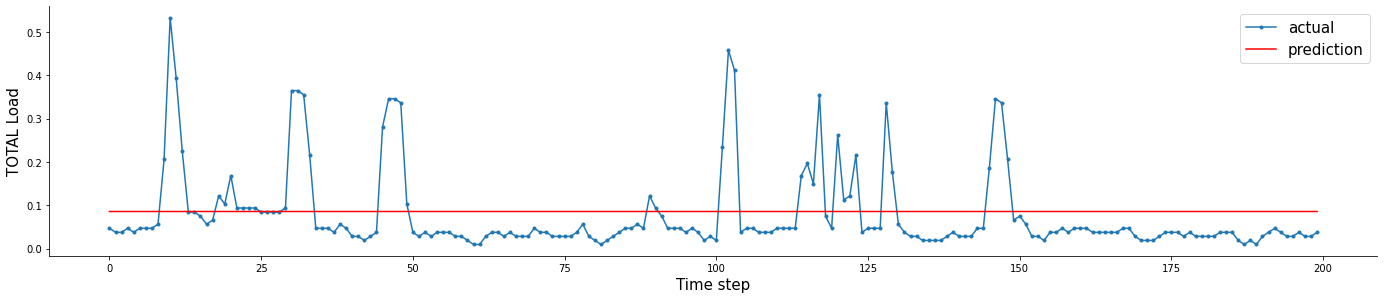

Epoch 1/74
198/198 [==============================] - 4s 10ms/step - loss: 0.0113 - val_loss: 0.0094
Epoch 2/74
198/198 [==============================] - 2s 9ms/step - loss: 0.0099 - val_loss: 0.0095
Epoch 3/74
198/198 [==============================] - 1s 7ms/step - loss: 0.0098 - val_loss: 0.0095
Epoch 4/74
198/198 [==============================] - 1s 7ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 5/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 6/74
198/198 [==============================] - 2s 11ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 7/74
198/198 [==============================] - 2s 9ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 8/74
198/198 [==============================] - 2s 9ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 9/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 10/74
198/198 [==============================] - 1s 7ms/step - loss: 0.0095 - val_loss: 0.00

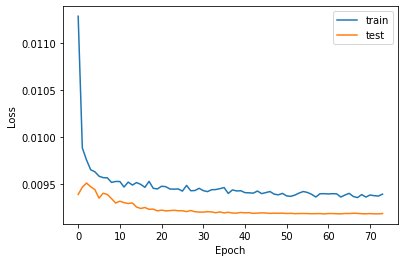

==============minmax===================
MAPE test is : 174858446598.5361
MAPE test invert is : 0.8076716646506993
==============zscore===================
MAPE test is : 0.6832580846658691
MAPE test invert is : 0.6156708364576053
RMSE Testing is : 0.096
RMSE Testing invert is : 102.581
R2 test is : -0.0010957230326902323
R2 test invert is : -0.0010957230326900103


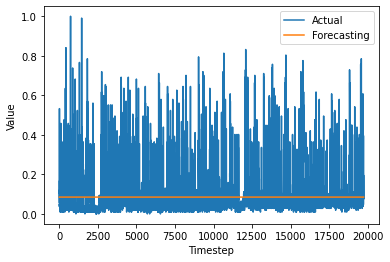

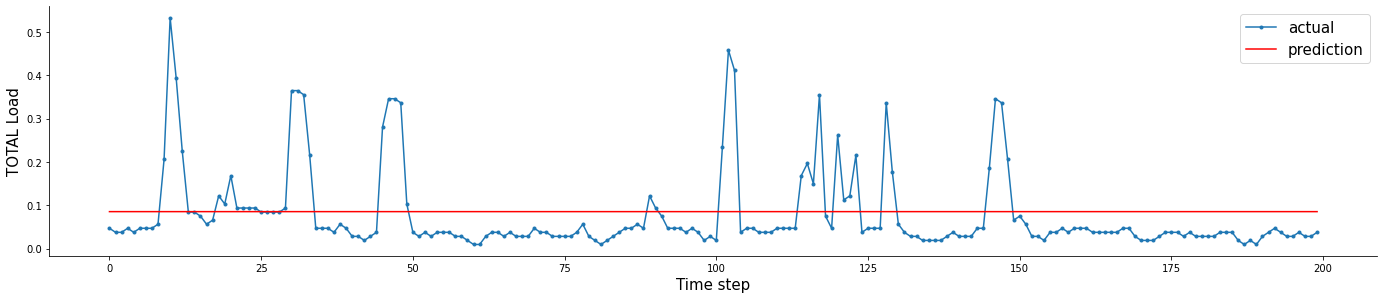

Epoch 1/74
198/198 [==============================] - 5s 10ms/step - loss: 0.0121 - val_loss: 0.0094
Epoch 2/74
198/198 [==============================] - 2s 9ms/step - loss: 0.0099 - val_loss: 0.0095
Epoch 3/74
198/198 [==============================] - 2s 9ms/step - loss: 0.0098 - val_loss: 0.0095
Epoch 4/74
198/198 [==============================] - 2s 9ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 5/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 6/74
198/198 [==============================] - 2s 11ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 7/74
198/198 [==============================] - 2s 9ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 8/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 9/74
198/198 [==============================] - 2s 10ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 10/74
198/198 [==============================] - 2s 9ms/step - loss: 0.0096 - val_loss: 0.0

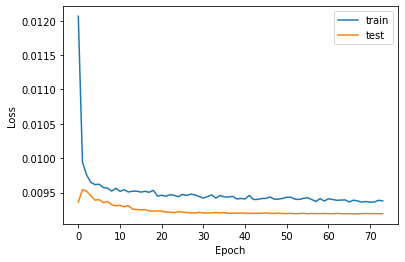

==============minmax===================
MAPE test is : 175204337463.52365
MAPE test invert is : 0.8101291009205117
==============zscore===================
MAPE test is : 0.6830352826042011
MAPE test invert is : 0.6155903746586765
RMSE Testing is : 0.096
RMSE Testing invert is : 102.587
R2 test is : -0.0012138726135955125
R2 test invert is : -0.0012138726135955125


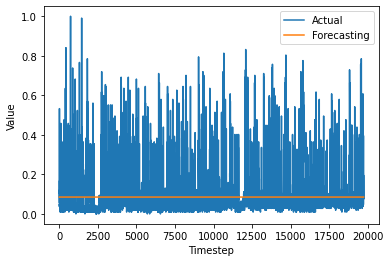

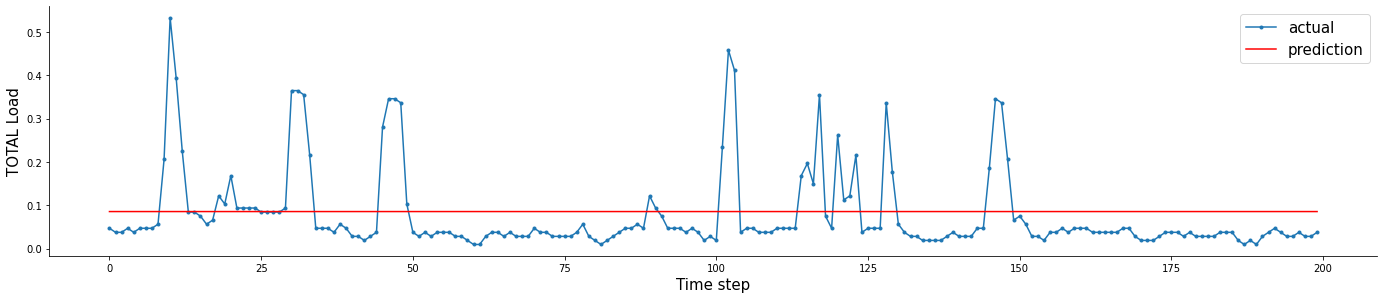

Epoch 1/74
198/198 [==============================] - 5s 14ms/step - loss: 0.0125 - val_loss: 0.0095
Epoch 2/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0100 - val_loss: 0.0095
Epoch 3/74
198/198 [==============================] - 2s 9ms/step - loss: 0.0098 - val_loss: 0.0095
Epoch 4/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0097 - val_loss: 0.0094
Epoch 5/74
198/198 [==============================] - 1s 8ms/step - loss: 0.0097 - val_loss: 0.0094
Epoch 6/74
198/198 [==============================] - 1s 7ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 7/74
198/198 [==============================] - 1s 7ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 8/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 9/74
198/198 [==============================] - 2s 11ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 10/74
198/198 [==============================] - 2s 9ms/step - loss: 0.0095 - val_loss: 0.00

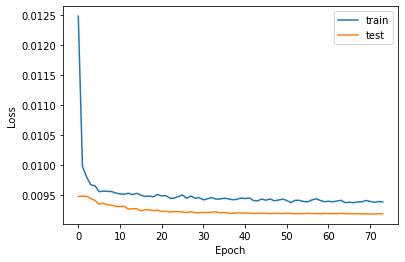

==============minmax===================
MAPE test is : 174184605114.43295
MAPE test invert is : 0.8028853579683829
==============zscore===================
MAPE test is : 0.6836844327623104
MAPE test invert is : 0.6158199609467689
RMSE Testing is : 0.096
RMSE Testing invert is : 102.569
R2 test is : -0.000871527675819328
R2 test invert is : -0.000871527675819106


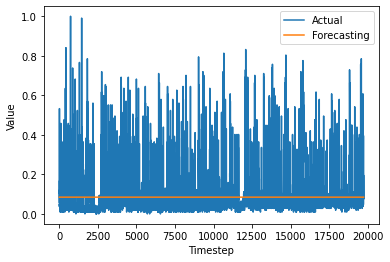

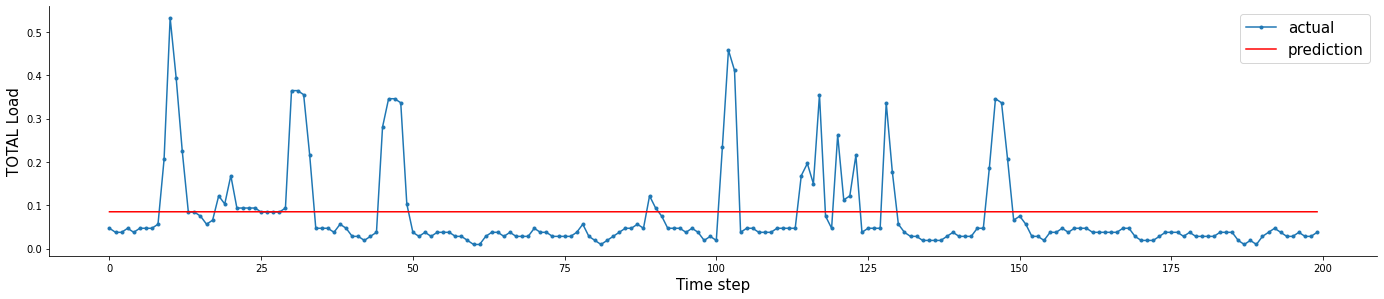

Epoch 1/74
198/198 [==============================] - 4s 8ms/step - loss: 0.0104 - val_loss: 0.0096
Epoch 2/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0099 - val_loss: 0.0095
Epoch 3/74
198/198 [==============================] - 1s 7ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 4/74
198/198 [==============================] - 2s 9ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 5/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 6/74
198/198 [==============================] - 2s 10ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 7/74
198/198 [==============================] - 2s 11ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 8/74
198/198 [==============================] - 2s 9ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 9/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 10/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0095 - val_loss: 0.00

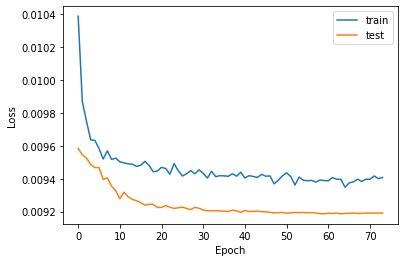

==============minmax===================
MAPE test is : 174868568699.15933
MAPE test invert is : 0.8077437959781362
==============zscore===================
MAPE test is : 0.6832501005262951
MAPE test invert is : 0.6156672813494092
RMSE Testing is : 0.096
RMSE Testing invert is : 102.581
R2 test is : -0.0010974286809950495
R2 test invert is : -0.0010974286809948275


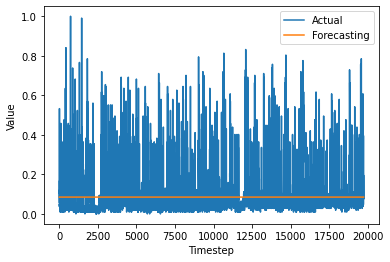

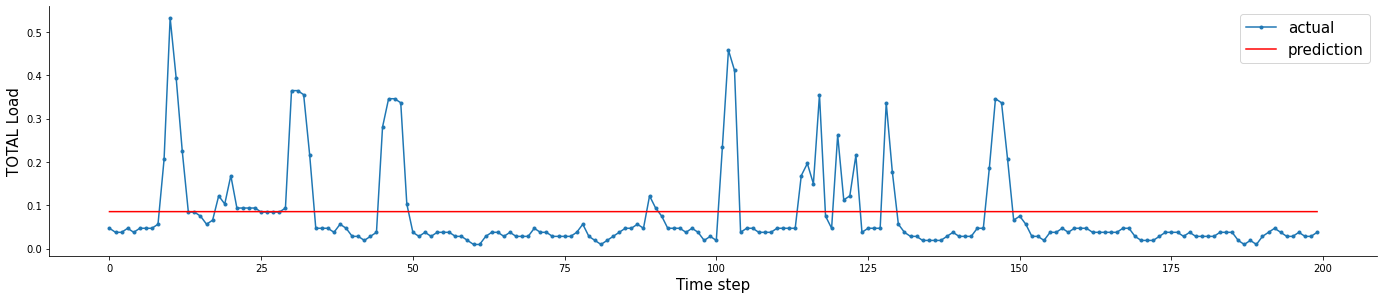

Epoch 1/74
198/198 [==============================] - 3s 8ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 2/74
198/198 [==============================] - 2s 11ms/step - loss: 0.0100 - val_loss: 0.0095
Epoch 3/74
198/198 [==============================] - 2s 11ms/step - loss: 0.0097 - val_loss: 0.0094
Epoch 4/74
198/198 [==============================] - 2s 8ms/step - loss: 0.0097 - val_loss: 0.0094
Epoch 5/74
198/198 [==============================] - 2s 9ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 6/74
198/198 [==============================] - 1s 7ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 7/74
198/198 [==============================] - 1s 7ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 8/74
198/198 [==============================] - 1s 7ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 9/74
198/198 [==============================] - 1s 7ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 10/74
198/198 [==============================] - 2s 10ms/step - loss: 0.0096 - val_loss: 0.0

KeyboardInterrupt: ignored

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto7
import shutil
for i in range(10):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network CNN
  model = Sequential()
  model.add(Conv1D(filters=69, kernel_size=1, activation='sigmoid', input_shape=(train_X.shape[1], train_X.shape[2])))

  model.add(MaxPool1D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(69, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(69, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=74, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto7") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  # xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  # yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto7")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto7")

# 5 run grid

## tanh zscore

Epoch 1/50
198/198 [==============================] - 2s 4ms/step - loss: 0.8061 - val_loss: 0.6808
Epoch 2/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6828 - val_loss: 0.6800
Epoch 3/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6816 - val_loss: 0.6796
Epoch 4/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6813 - val_loss: 0.6790
Epoch 5/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6805 - val_loss: 0.6791
Epoch 6/50
198/198 [==============================] - 0s 2ms/step - loss: 0.6789 - val_loss: 0.6779
Epoch 7/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6793 - val_loss: 0.6787
Epoch 8/50
198/198 [==============================] - 0s 2ms/step - loss: 0.6793 - val_loss: 0.6780
Epoch 9/50
198/198 [==============================] - 0s 2ms/step - loss: 0.6784 - val_loss: 0.6784
Epoch 10/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6787 - val_loss: 0.6789

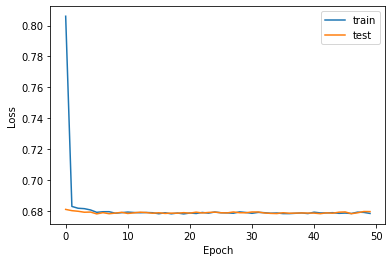

==============minmax===================
MAPE test is : 1.4284814764596776
MAPE test invert is : 0.7640252507547525
==============zscore===================
MAPE test is : 403060232121627.06
MAPE test invert is : 0.45869477898085625
RMSE Testing is : 0.824
RMSE Testing invert is : 84.505
R2 test is : 0.3206199074605156
R2 test invert is : 0.32061990746051583


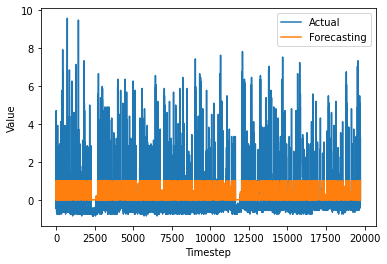

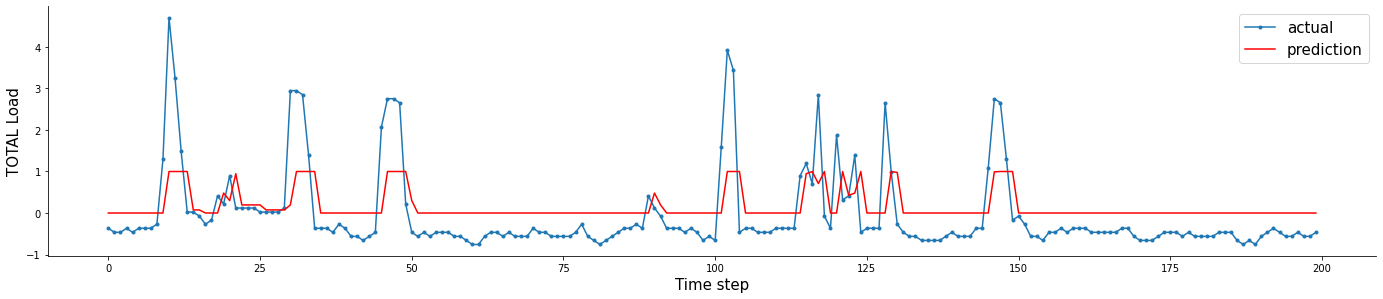

Epoch 1/50
198/198 [==============================] - 4s 8ms/step - loss: 0.8316 - val_loss: 0.6813
Epoch 2/50
198/198 [==============================] - 1s 5ms/step - loss: 0.6831 - val_loss: 0.6807
Epoch 3/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6816 - val_loss: 0.6802
Epoch 4/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6802 - val_loss: 0.6794
Epoch 5/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6799 - val_loss: 0.6786
Epoch 6/50
198/198 [==============================] - 1s 5ms/step - loss: 0.6796 - val_loss: 0.6785
Epoch 7/50
198/198 [==============================] - 1s 6ms/step - loss: 0.6795 - val_loss: 0.6787
Epoch 8/50
198/198 [==============================] - 1s 5ms/step - loss: 0.6794 - val_loss: 0.6788
Epoch 9/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6796 - val_loss: 0.6784
Epoch 10/50
198/198 [==============================] - 1s 5ms/step - loss: 0.6786 - val_loss: 0.678

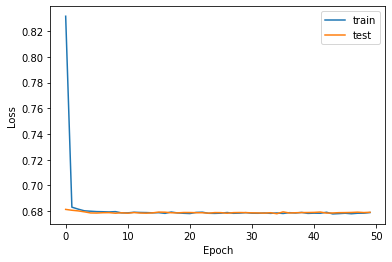

==============minmax===================
MAPE test is : 1.4511286757936748
MAPE test invert is : 0.7652879767731074
==============zscore===================
MAPE test is : 412276466338839.2
MAPE test invert is : 0.45885218871480093
RMSE Testing is : 0.824
RMSE Testing invert is : 84.485
R2 test is : 0.3209467155185708
R2 test invert is : 0.320946715518571


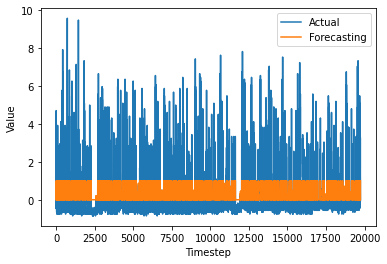

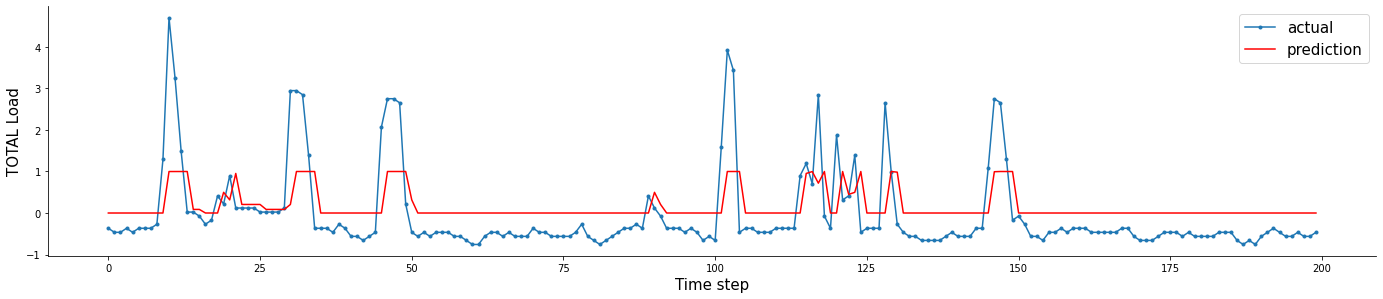

Epoch 1/50
198/198 [==============================] - 2s 5ms/step - loss: 0.8280 - val_loss: 0.6816
Epoch 2/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6826 - val_loss: 0.6804
Epoch 3/50
198/198 [==============================] - 1s 6ms/step - loss: 0.6813 - val_loss: 0.6796
Epoch 4/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6804 - val_loss: 0.6790
Epoch 5/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6807 - val_loss: 0.6787
Epoch 6/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6793 - val_loss: 0.6785
Epoch 7/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6788 - val_loss: 0.6788
Epoch 8/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6789 - val_loss: 0.6796
Epoch 9/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6790 - val_loss: 0.6785
Epoch 10/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6788 - val_loss: 0.6785

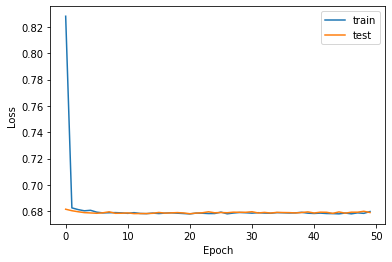

==============minmax===================
MAPE test is : 1.432322509666666
MAPE test invert is : 0.7647251211854279
==============zscore===================
MAPE test is : 505603230326528.5
MAPE test invert is : 0.4586646797331695
RMSE Testing is : 0.824
RMSE Testing invert is : 84.483
R2 test is : 0.3209714519621035
R2 test invert is : 0.32097145196210364


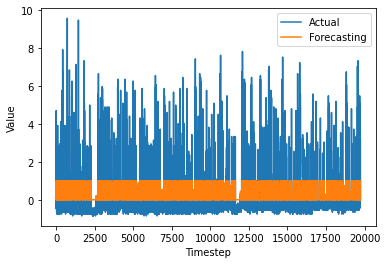

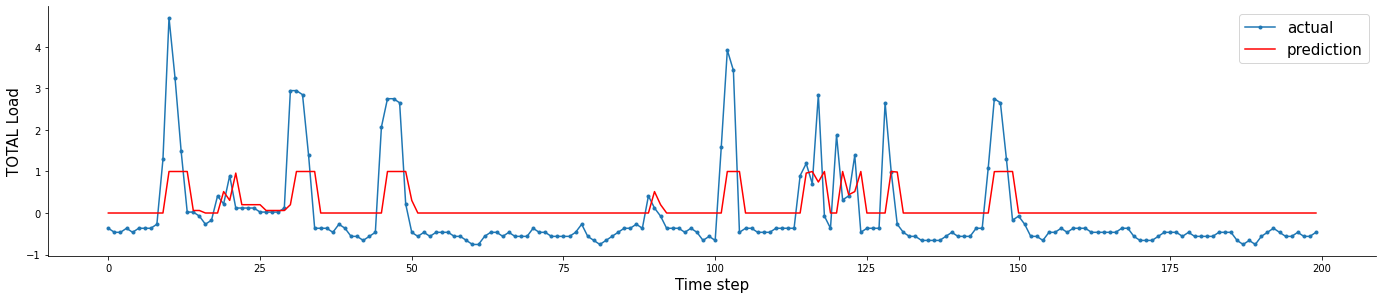

Epoch 1/50
198/198 [==============================] - 1s 4ms/step - loss: 0.8142 - val_loss: 0.6807
Epoch 2/50
198/198 [==============================] - 1s 5ms/step - loss: 0.6836 - val_loss: 0.6804
Epoch 3/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6815 - val_loss: 0.6793
Epoch 4/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6816 - val_loss: 0.6790
Epoch 5/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6799 - val_loss: 0.6792
Epoch 6/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6800 - val_loss: 0.6784
Epoch 7/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6789 - val_loss: 0.6787
Epoch 8/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6796 - val_loss: 0.6786
Epoch 9/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6792 - val_loss: 0.6787
Epoch 10/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6784 - val_loss: 0.6786

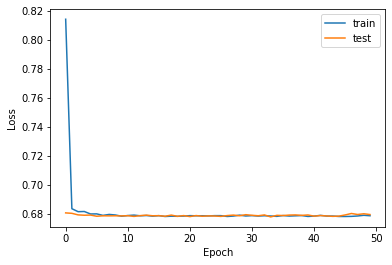

==============minmax===================
MAPE test is : 1.4290483242395637
MAPE test invert is : 0.7642192067658062
==============zscore===================
MAPE test is : 585667740552558.4
MAPE test invert is : 0.45877854571450544
RMSE Testing is : 0.824
RMSE Testing invert is : 84.512
R2 test is : 0.3205131914189814
R2 test invert is : 0.3205131914189815


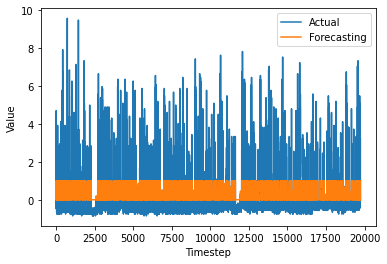

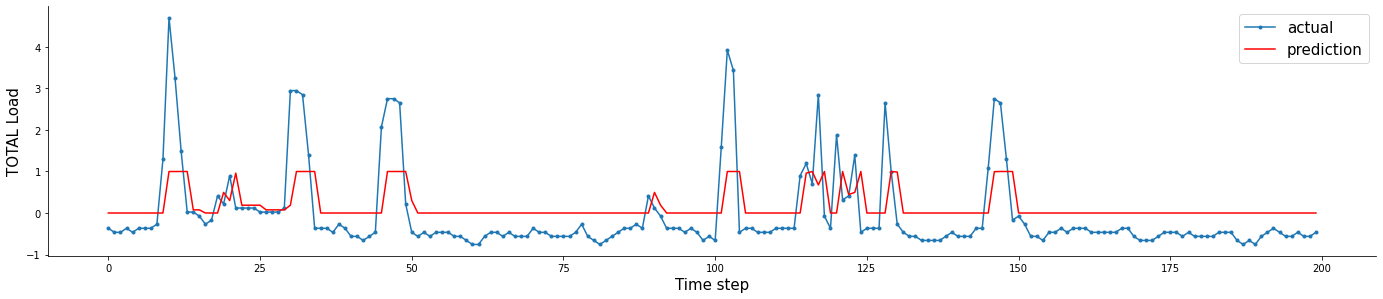

Epoch 1/50
198/198 [==============================] - 2s 4ms/step - loss: 0.8039 - val_loss: 0.6810
Epoch 2/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6812 - val_loss: 0.6803
Epoch 3/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6804 - val_loss: 0.6795
Epoch 4/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6809 - val_loss: 0.6791
Epoch 5/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6795 - val_loss: 0.6790
Epoch 6/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6803 - val_loss: 0.6785
Epoch 7/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6785 - val_loss: 0.6786
Epoch 8/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6789 - val_loss: 0.6790
Epoch 9/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6787 - val_loss: 0.6788
Epoch 10/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6790 - val_loss: 0.6787

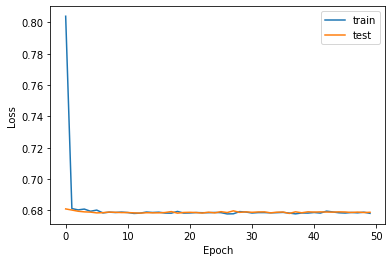

==============minmax===================
MAPE test is : 1.4577478639805075
MAPE test invert is : 0.7660131529134723
==============zscore===================
MAPE test is : 434771882341103.56
MAPE test invert is : 0.45913164195419354
RMSE Testing is : 0.824
RMSE Testing invert is : 84.470
R2 test is : 0.3211812516777818
R2 test invert is : 0.3211812516777819


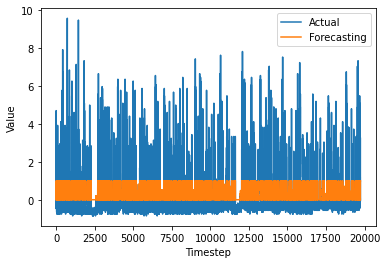

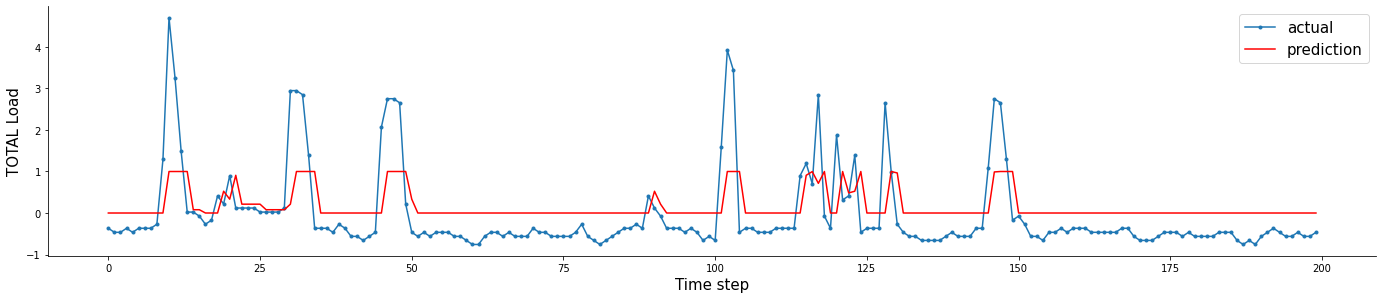

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto
import shutil

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

  #design network CNN
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))

  model.add(MaxPool1D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.show()
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  # xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  # yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto")

## tanh minmax

Epoch 1/50
198/198 [==============================] - 2s 5ms/step - loss: 0.0396 - val_loss: 0.0107
Epoch 2/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0105 - val_loss: 0.0063
Epoch 3/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0066 - val_loss: 0.0043
Epoch 4/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0054 - val_loss: 0.0041
Epoch 5/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 6/50
198/198 [==============================] - 1s 6ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 7/50
198/198 [==============================] - 2s 10ms/step - loss: 0.0047 - val_loss: 0.0039
Epoch 8/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 9/50
198/198 [==============================] - 1s 6ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 10/50
198/198 [==============================] - 1s 6ms/step - loss: 0.0045 - val_loss: 0.003

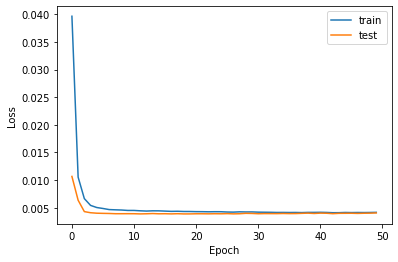

==============minmax===================
MAPE test is : 81700203614.1767
MAPE test invert is : 0.36457031843754695
==============zscore===================
MAPE test is : 0.34138389263494573
MAPE test invert is : 0.30042413785865396
RMSE Testing is : 0.064
RMSE Testing invert is : 68.055
R2 test is : 0.5593827320848912
R2 test invert is : 0.5593827320848913


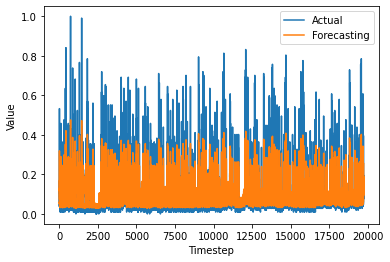

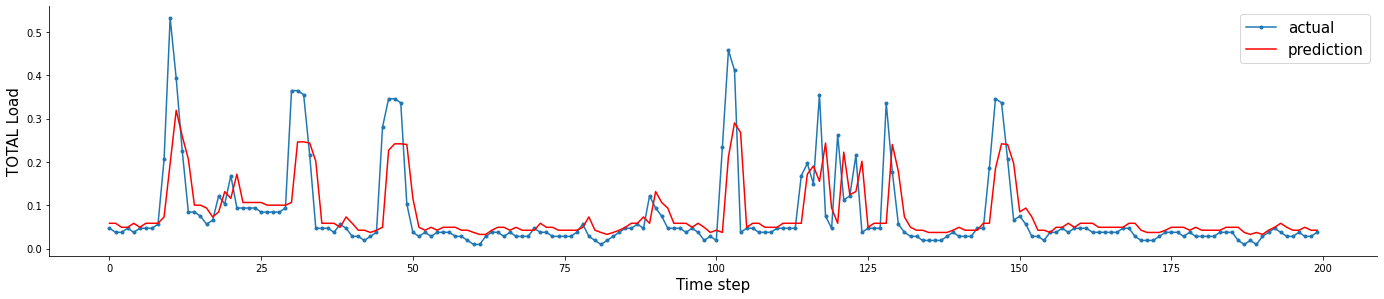

Epoch 1/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0360 - val_loss: 0.0077
Epoch 2/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0067 - val_loss: 0.0042
Epoch 3/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0052 - val_loss: 0.0040
Epoch 4/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 5/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 6/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 7/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 8/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 9/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 10/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0045 - val_loss: 0.0039

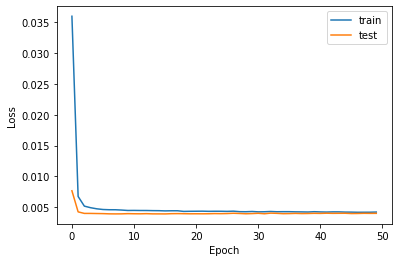

==============minmax===================
MAPE test is : 86072545553.1535
MAPE test invert is : 0.32711984353303697
==============zscore===================
MAPE test is : 0.3229773513496742
MAPE test invert is : 0.2828399778663402
RMSE Testing is : 0.063
RMSE Testing invert is : 67.548
R2 test is : 0.5659205484232345
R2 test invert is : 0.5659205484232346


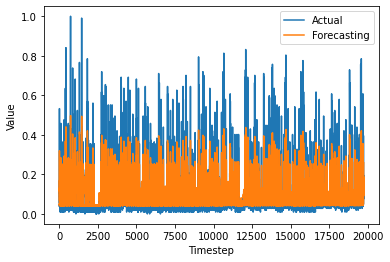

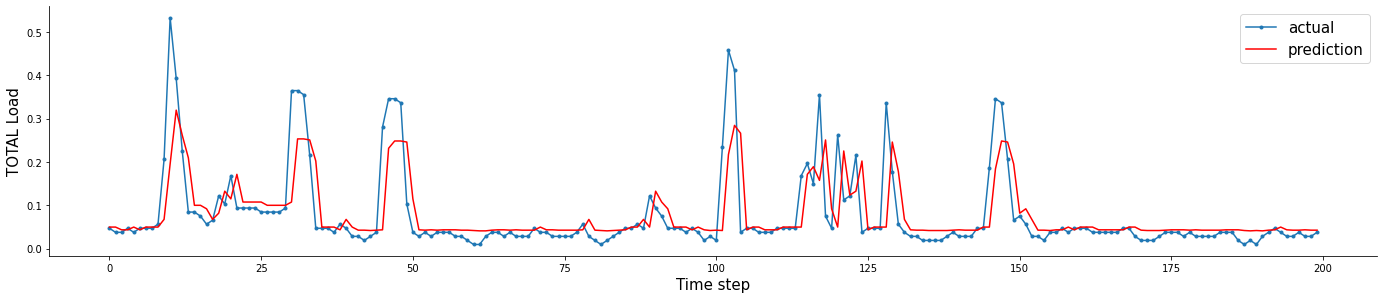

Epoch 1/50
198/198 [==============================] - 2s 4ms/step - loss: 0.0322 - val_loss: 0.0061
Epoch 2/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0060 - val_loss: 0.0042
Epoch 3/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 4/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 5/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 6/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 7/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 8/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 9/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 10/50
198/198 [==============================] - 1s 7ms/step - loss: 0.0044 - val_loss: 0.0039

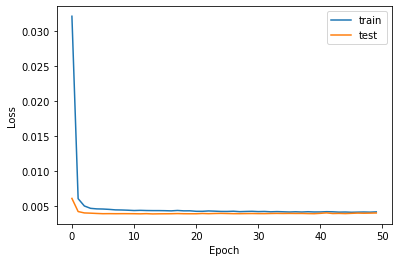

==============minmax===================
MAPE test is : 87473037559.0678
MAPE test invert is : 0.3806966305284912
==============zscore===================
MAPE test is : 0.3436146749747508
MAPE test invert is : 0.3029656088575003
RMSE Testing is : 0.063
RMSE Testing invert is : 67.668
R2 test is : 0.5643727026080009
R2 test invert is : 0.5643727026080009


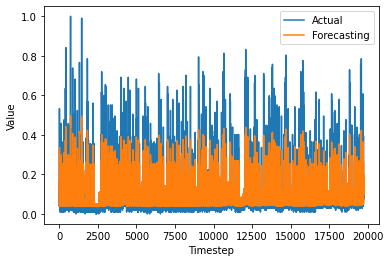

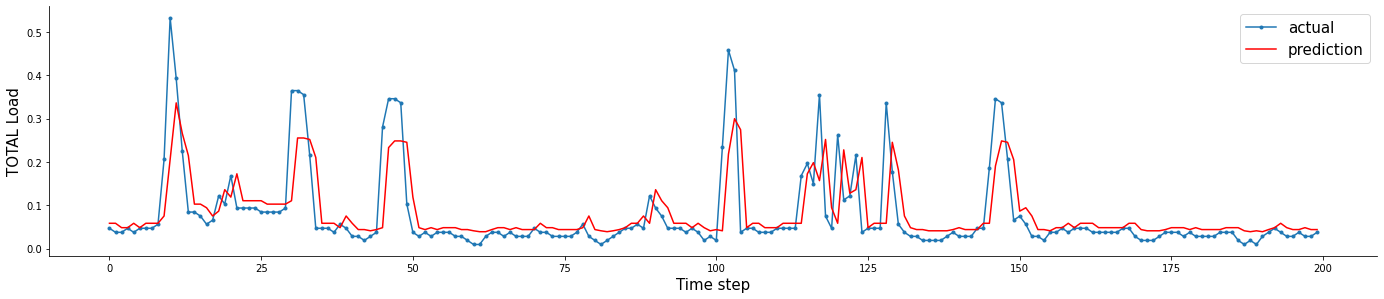

Epoch 1/50
198/198 [==============================] - 2s 5ms/step - loss: 0.0344 - val_loss: 0.0106
Epoch 2/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0095 - val_loss: 0.0050
Epoch 3/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0057 - val_loss: 0.0042
Epoch 4/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0051 - val_loss: 0.0040
Epoch 5/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 6/50
198/198 [==============================] - 1s 7ms/step - loss: 0.0047 - val_loss: 0.0039
Epoch 7/50
198/198 [==============================] - 1s 5ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 8/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 9/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 10/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0045 - val_loss: 0.0039

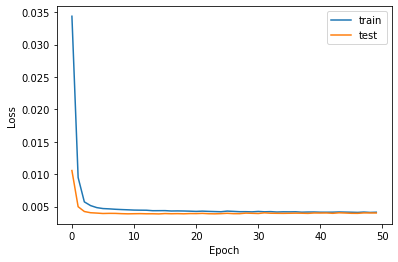

==============minmax===================
MAPE test is : 83755844459.54657
MAPE test invert is : 0.3702059005493442
==============zscore===================
MAPE test is : 0.3422896001508295
MAPE test invert is : 0.30140926156809167
RMSE Testing is : 0.063
RMSE Testing invert is : 67.698
R2 test is : 0.5639963091801264
R2 test invert is : 0.5639963091801266


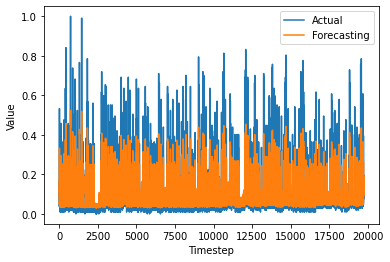

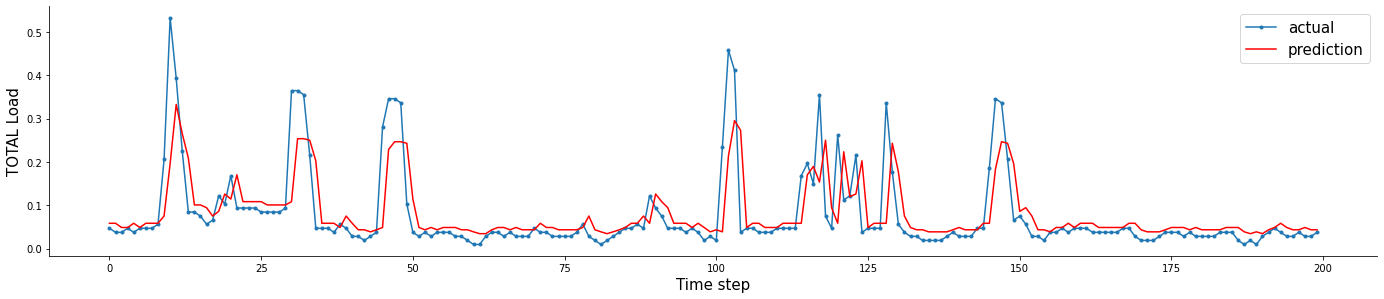

Epoch 1/50
198/198 [==============================] - 2s 4ms/step - loss: 0.0282 - val_loss: 0.0069
Epoch 2/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0064 - val_loss: 0.0043
Epoch 3/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 4/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 5/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 6/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 7/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 8/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 9/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 10/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0044 - val_loss: 0.0039

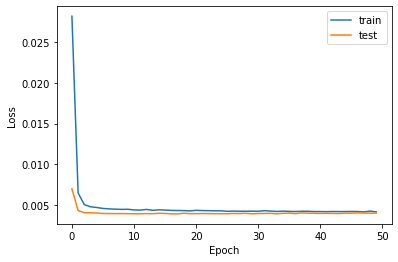

==============minmax===================
MAPE test is : 84380774076.2291
MAPE test invert is : 0.3436994750104298
==============zscore===================
MAPE test is : 0.3279610043326302
MAPE test invert is : 0.28792481254978514
RMSE Testing is : 0.063
RMSE Testing invert is : 67.348
R2 test is : 0.5684908752796779
R2 test invert is : 0.5684908752796778


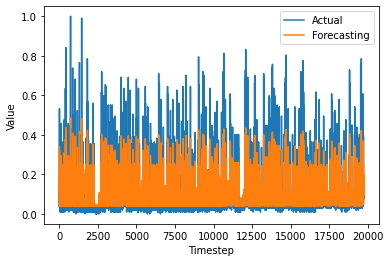

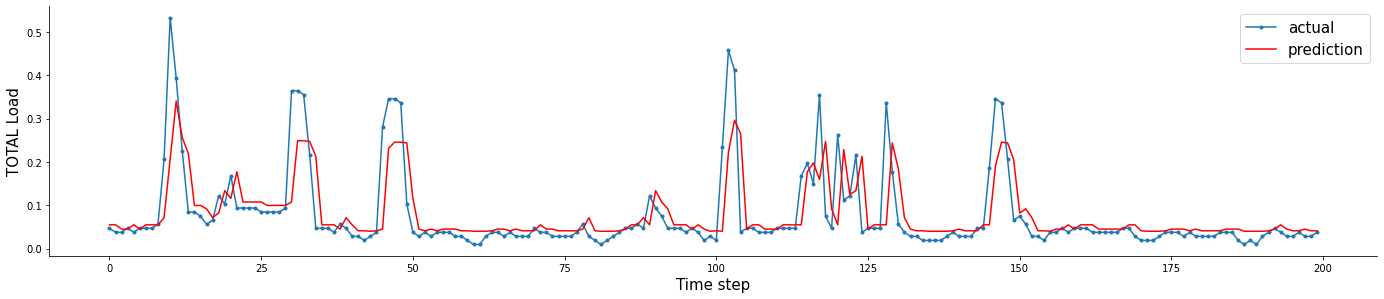

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network CNN
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))

  model.add(MaxPool1D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto2") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  # xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  # yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto2")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto2")

## sig minmax

mkdir: cannot create directory ‘foto3’: File exists
Epoch 1/50
198/198 [==============================] - 3s 5ms/step - loss: 0.0116 - val_loss: 0.0093
Epoch 2/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0102 - val_loss: 0.0092
Epoch 3/50
198/198 [==============================] - 1s 6ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 4/50
198/198 [==============================] - 1s 7ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 5/50
198/198 [==============================] - 1s 5ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 6/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 7/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 8/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 9/50
198/198 [==============================] - 1s 5ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 10/50
198/198 [===========================

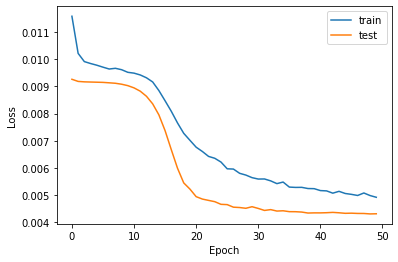

==============minmax===================
MAPE test is : 106487208891.09337
MAPE test invert is : 0.3997086988788407
==============zscore===================
MAPE test is : 0.3862761104689069
MAPE test invert is : 0.3391268032505677
RMSE Testing is : 0.066
RMSE Testing invert is : 70.241
R2 test is : 0.5306224001736187
R2 test invert is : 0.5306224001736187


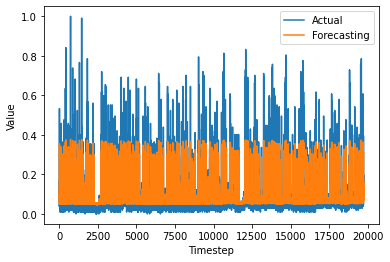

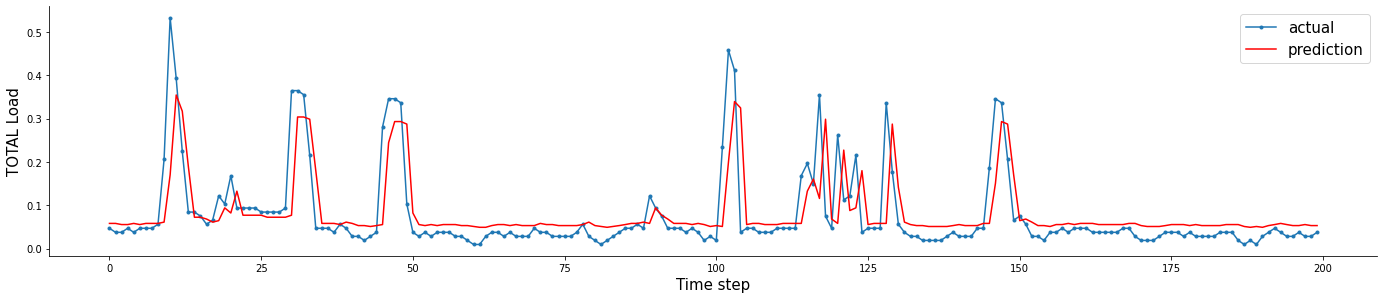

Epoch 1/50
198/198 [==============================] - 2s 5ms/step - loss: 0.0257 - val_loss: 0.0093
Epoch 2/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0102 - val_loss: 0.0092
Epoch 3/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0100 - val_loss: 0.0092
Epoch 4/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 5/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0098 - val_loss: 0.0091
Epoch 6/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0098 - val_loss: 0.0091
Epoch 7/50
198/198 [==============================] - 1s 6ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 8/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 9/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 10/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0096 - val_loss: 0.0091

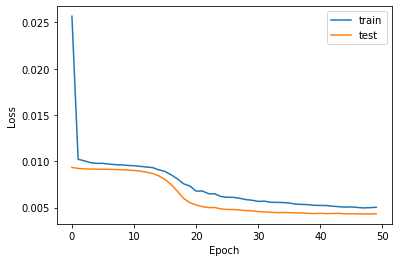

==============minmax===================
MAPE test is : 111799835826.54842
MAPE test invert is : 0.4314921726497564
==============zscore===================
MAPE test is : 0.39325348698944523
MAPE test invert is : 0.3466168159172787
RMSE Testing is : 0.066
RMSE Testing invert is : 70.346
R2 test is : 0.529212275759821
R2 test invert is : 0.529212275759821


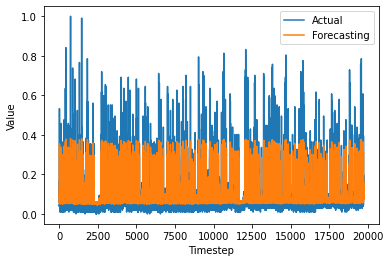

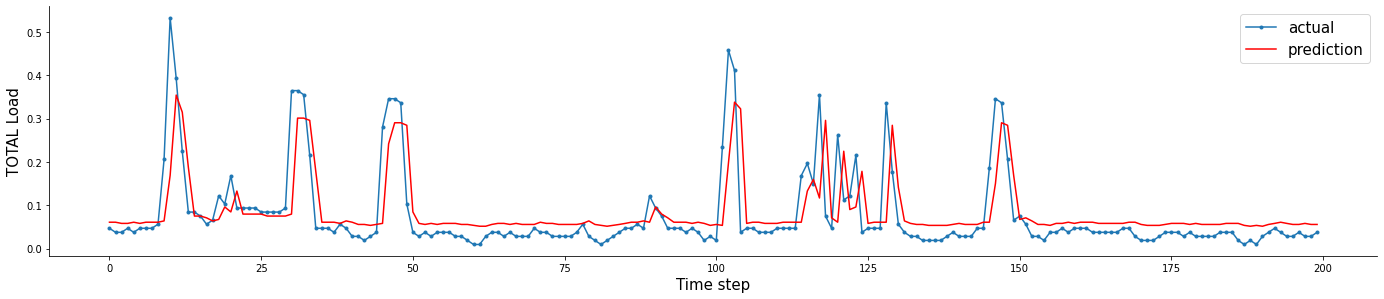

Epoch 1/50
198/198 [==============================] - 7s 24ms/step - loss: 0.0373 - val_loss: 0.0093
Epoch 2/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0102 - val_loss: 0.0092
Epoch 3/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0100 - val_loss: 0.0092
Epoch 4/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 5/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0098 - val_loss: 0.0091
Epoch 6/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 7/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 8/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 9/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 10/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0096 - val_loss: 0.0

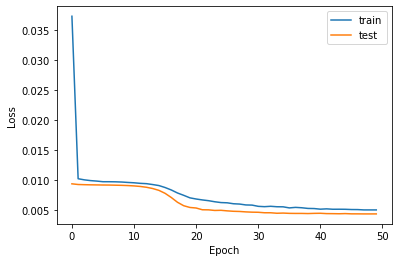

==============minmax===================
MAPE test is : 106845322621.91647
MAPE test invert is : 0.400807082690766
==============zscore===================
MAPE test is : 0.3883719803234495
MAPE test invert is : 0.3410159840484803
RMSE Testing is : 0.066
RMSE Testing invert is : 70.274
R2 test is : 0.5301837869243984
R2 test invert is : 0.5301837869243986


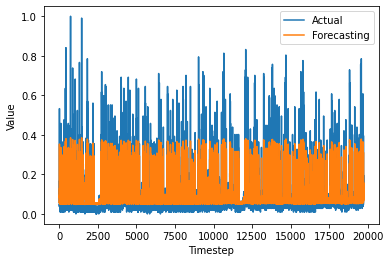

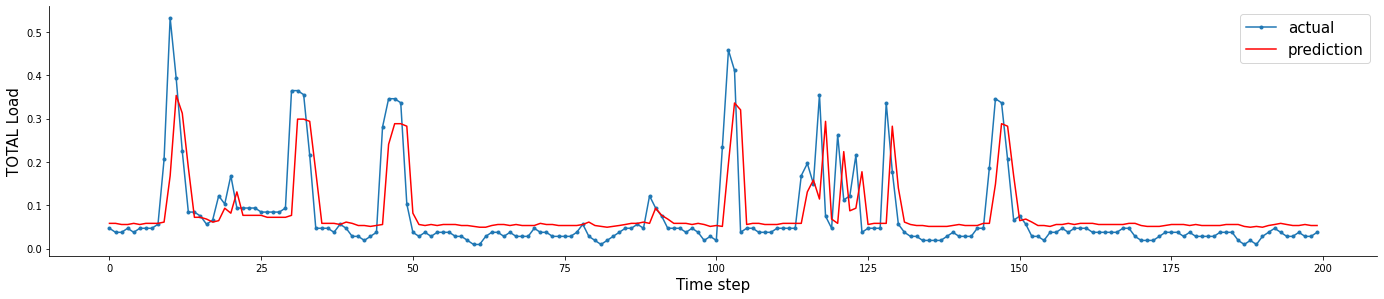

Epoch 1/50
198/198 [==============================] - 2s 6ms/step - loss: 0.0163 - val_loss: 0.0093
Epoch 2/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 3/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0100 - val_loss: 0.0092
Epoch 4/50
198/198 [==============================] - 1s 5ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 5/50
198/198 [==============================] - 1s 5ms/step - loss: 0.0098 - val_loss: 0.0091
Epoch 6/50
198/198 [==============================] - 1s 6ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 7/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 8/50
198/198 [==============================] - 1s 5ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 9/50
198/198 [==============================] - 1s 5ms/step - loss: 0.0096 - val_loss: 0.0090
Epoch 10/50
198/198 [==============================] - 1s 5ms/step - loss: 0.0096 - val_loss: 0.0090

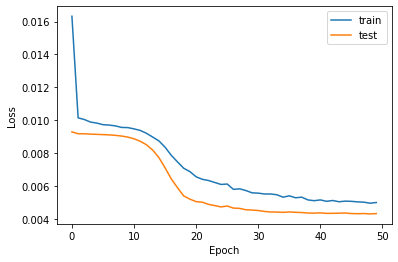

==============minmax===================
MAPE test is : 109284042382.4634
MAPE test invert is : 0.4155796318845733
==============zscore===================
MAPE test is : 0.39180887620479676
MAPE test invert is : 0.34467389766800244
RMSE Testing is : 0.066
RMSE Testing invert is : 70.406
R2 test is : 0.5284171258227266
R2 test invert is : 0.5284171258227267


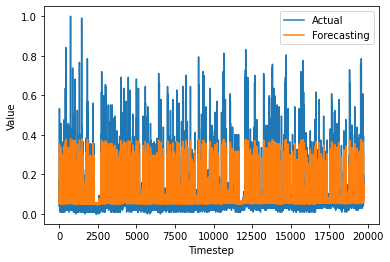

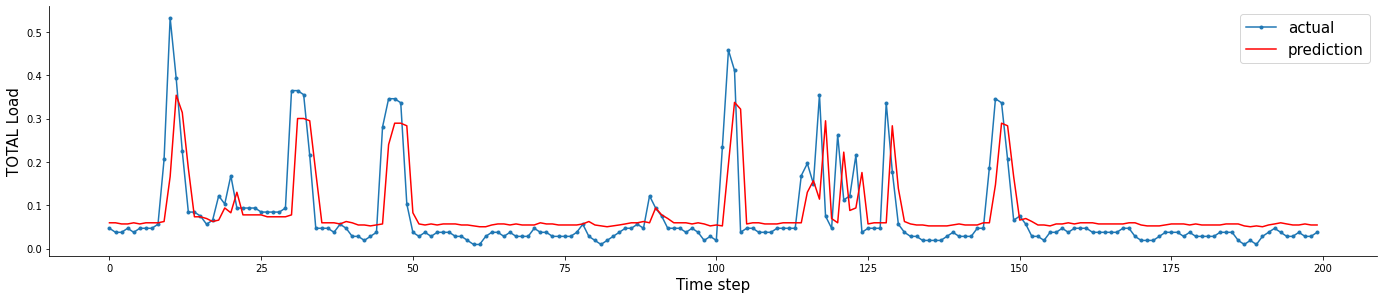

Epoch 1/50
198/198 [==============================] - 2s 5ms/step - loss: 0.0180 - val_loss: 0.0093
Epoch 2/50
198/198 [==============================] - 1s 5ms/step - loss: 0.0102 - val_loss: 0.0092
Epoch 3/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0100 - val_loss: 0.0092
Epoch 4/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 5/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 6/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 7/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 8/50
198/198 [==============================] - 1s 5ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 9/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0095 - val_loss: 0.0090
Epoch 10/50
198/198 [==============================] - 1s 4ms/step - loss: 0.0095 - val_loss: 0.0090

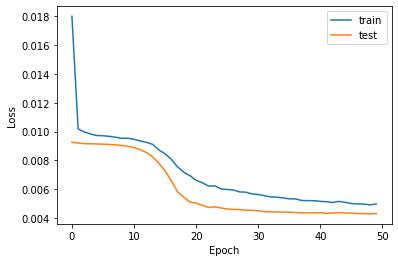

==============minmax===================
MAPE test is : 107917551996.99461
MAPE test invert is : 0.4098905333072447
==============zscore===================
MAPE test is : 0.38762419250624985
MAPE test invert is : 0.34088069677827687
RMSE Testing is : 0.066
RMSE Testing invert is : 70.256
R2 test is : 0.530411810122848
R2 test invert is : 0.5304118101228479


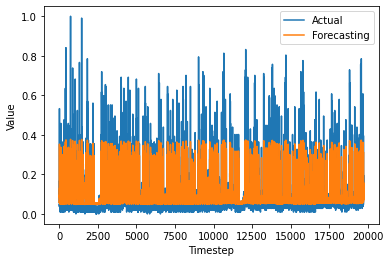

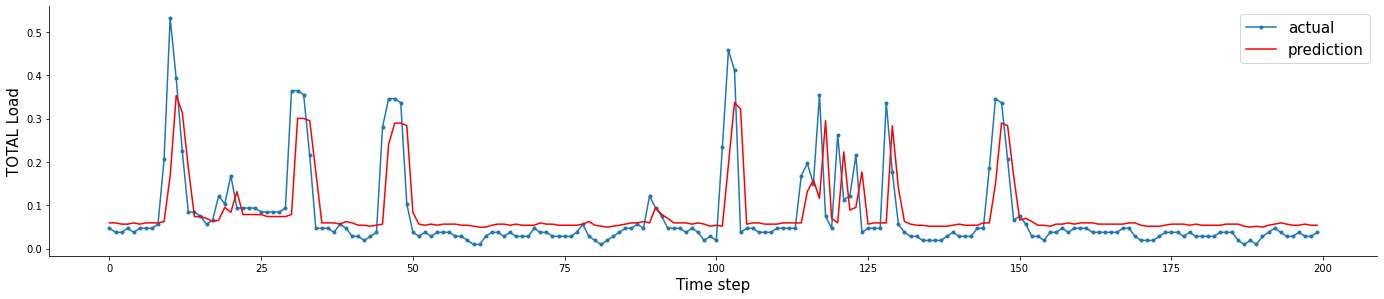

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto3
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network CNN
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=1, activation='sigmoid', input_shape=(train_X.shape[1], train_X.shape[2])))

  model.add(MaxPool1D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(32, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(32, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto3") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  # xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  # yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto3")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto3")

## sig zscore

Epoch 1/50
198/198 [==============================] - 2s 4ms/step - loss: 1.0394 - val_loss: 0.9998
Epoch 2/50
198/198 [==============================] - 0s 3ms/step - loss: 0.9994 - val_loss: 0.9951
Epoch 3/50
198/198 [==============================] - 1s 3ms/step - loss: 0.9839 - val_loss: 0.9554
Epoch 4/50
198/198 [==============================] - 1s 3ms/step - loss: 0.9095 - val_loss: 0.8232
Epoch 5/50
198/198 [==============================] - 1s 3ms/step - loss: 0.7889 - val_loss: 0.7246
Epoch 6/50
198/198 [==============================] - 1s 3ms/step - loss: 0.7214 - val_loss: 0.6984
Epoch 7/50
198/198 [==============================] - 1s 3ms/step - loss: 0.7005 - val_loss: 0.6913
Epoch 8/50
198/198 [==============================] - 0s 2ms/step - loss: 0.6965 - val_loss: 0.6911
Epoch 9/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6927 - val_loss: 0.6897
Epoch 10/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6903 - val_loss: 0.6887

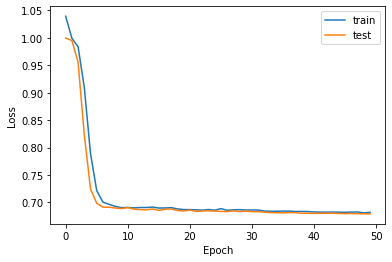

==============minmax===================
MAPE test is : 1.3954379119159317
MAPE test invert is : 0.7638289248791696
==============zscore===================
MAPE test is : 3068.5275986969787
MAPE test invert is : 0.45810458695906886
RMSE Testing is : 0.824
RMSE Testing invert is : 84.477
R2 test is : 0.32107452841764583
R2 test invert is : 0.32107452841764594


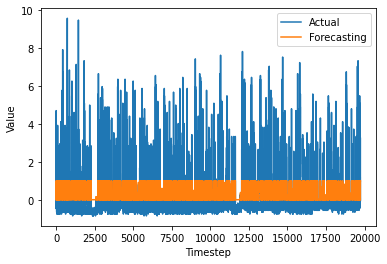

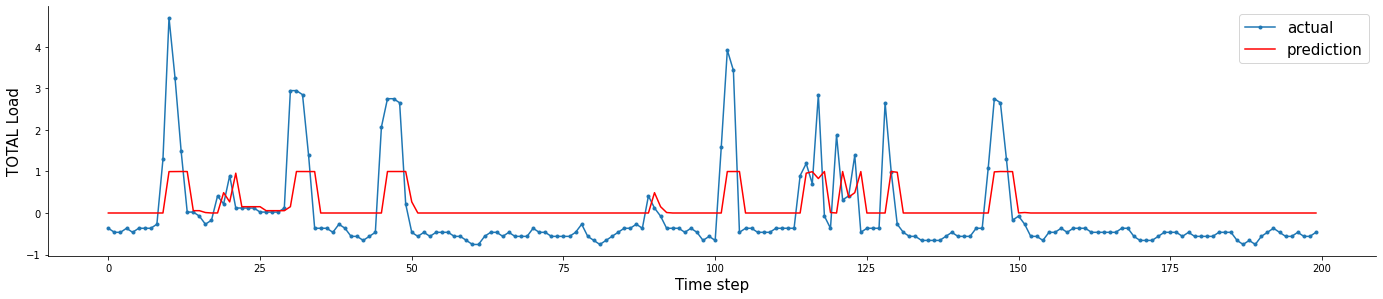

Epoch 1/50
198/198 [==============================] - 2s 4ms/step - loss: 1.0315 - val_loss: 0.9975
Epoch 2/50
198/198 [==============================] - 1s 3ms/step - loss: 0.9925 - val_loss: 0.9762
Epoch 3/50
198/198 [==============================] - 1s 3ms/step - loss: 0.9335 - val_loss: 0.8522
Epoch 4/50
198/198 [==============================] - 1s 3ms/step - loss: 0.8112 - val_loss: 0.7336
Epoch 5/50
198/198 [==============================] - 1s 3ms/step - loss: 0.7297 - val_loss: 0.6983
Epoch 6/50
198/198 [==============================] - 1s 3ms/step - loss: 0.7014 - val_loss: 0.6892
Epoch 7/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6934 - val_loss: 0.6895
Epoch 8/50
198/198 [==============================] - 0s 2ms/step - loss: 0.6944 - val_loss: 0.6865
Epoch 9/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6918 - val_loss: 0.6860
Epoch 10/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6912 - val_loss: 0.6844

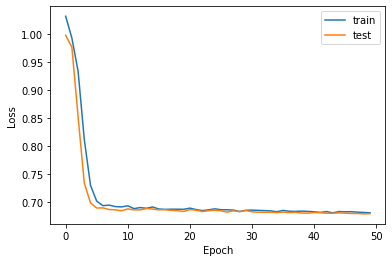

==============minmax===================
MAPE test is : 1.3743695837972842
MAPE test invert is : 0.7630633758638219
==============zscore===================
MAPE test is : 3020.923237620458
MAPE test invert is : 0.4578693059913043
RMSE Testing is : 0.824
RMSE Testing invert is : 84.490
R2 test is : 0.3208712755229941
R2 test invert is : 0.3208712755229942


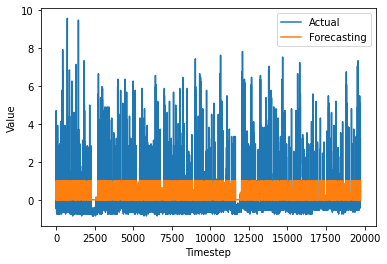

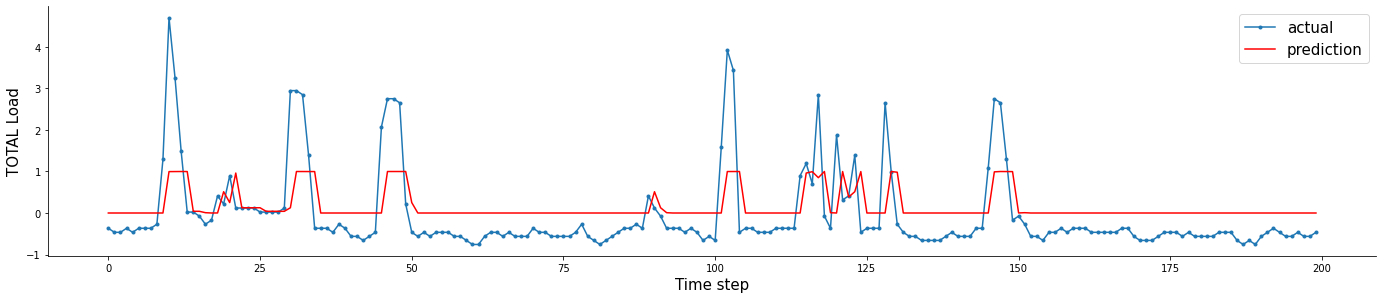

Epoch 1/50
198/198 [==============================] - 2s 4ms/step - loss: 1.0423 - val_loss: 0.9977
Epoch 2/50
198/198 [==============================] - 1s 3ms/step - loss: 0.9946 - val_loss: 0.9829
Epoch 3/50
198/198 [==============================] - 1s 3ms/step - loss: 0.9504 - val_loss: 0.8777
Epoch 4/50
198/198 [==============================] - 1s 4ms/step - loss: 0.8319 - val_loss: 0.7525
Epoch 5/50
198/198 [==============================] - 1s 4ms/step - loss: 0.7409 - val_loss: 0.7038
Epoch 6/50
198/198 [==============================] - 1s 4ms/step - loss: 0.7086 - val_loss: 0.6936
Epoch 7/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6999 - val_loss: 0.6899
Epoch 8/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6933 - val_loss: 0.6896
Epoch 9/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6945 - val_loss: 0.6894
Epoch 10/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6909 - val_loss: 0.6883

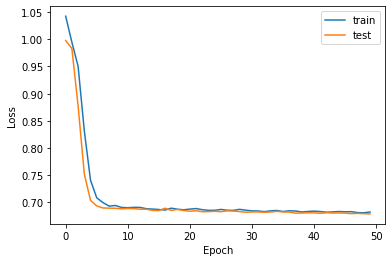

==============minmax===================
MAPE test is : 1.390460222746893
MAPE test invert is : 0.7641225509389605
==============zscore===================
MAPE test is : 1811.4683842014763
MAPE test invert is : 0.4580730662378116
RMSE Testing is : 0.824
RMSE Testing invert is : 84.478
R2 test is : 0.32106262706792876
R2 test invert is : 0.3210626270679291


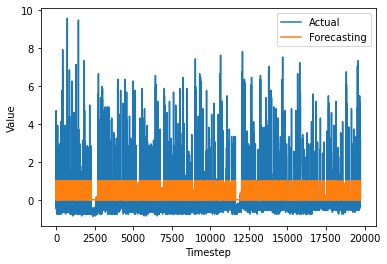

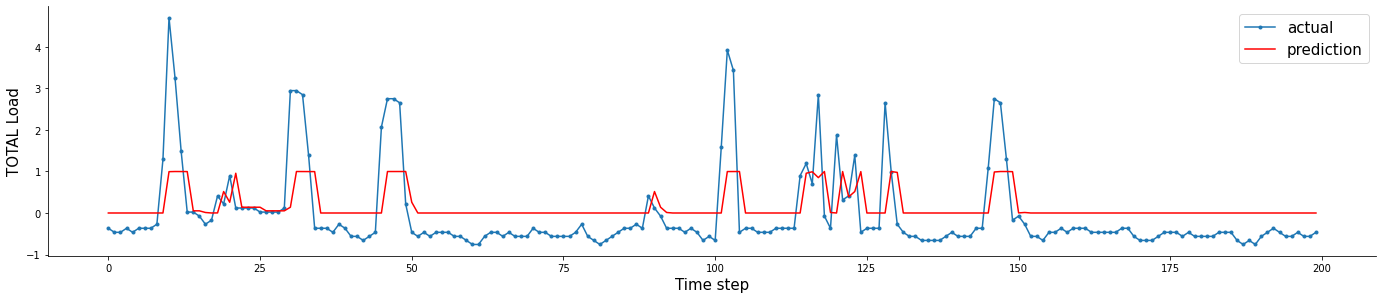

Epoch 1/50
198/198 [==============================] - 2s 4ms/step - loss: 1.0394 - val_loss: 0.9993
Epoch 2/50
198/198 [==============================] - 1s 4ms/step - loss: 0.9985 - val_loss: 0.9946
Epoch 3/50
198/198 [==============================] - 1s 7ms/step - loss: 0.9829 - val_loss: 0.9574
Epoch 4/50
198/198 [==============================] - 1s 7ms/step - loss: 0.9220 - val_loss: 0.8540
Epoch 5/50
198/198 [==============================] - 1s 8ms/step - loss: 0.8219 - val_loss: 0.7532
Epoch 6/50
198/198 [==============================] - 2s 8ms/step - loss: 0.7425 - val_loss: 0.7058
Epoch 7/50
198/198 [==============================] - 1s 4ms/step - loss: 0.7114 - val_loss: 0.6926
Epoch 8/50
198/198 [==============================] - 1s 5ms/step - loss: 0.6974 - val_loss: 0.6900
Epoch 9/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6950 - val_loss: 0.6892
Epoch 10/50
198/198 [==============================] - 1s 5ms/step - loss: 0.6938 - val_loss: 0.6854

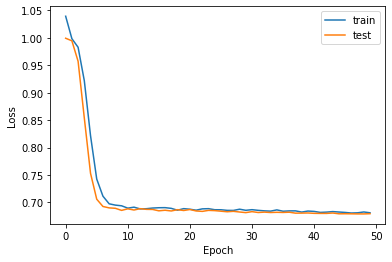

==============minmax===================
MAPE test is : 1.368544779840056
MAPE test invert is : 0.7623549071392852
==============zscore===================
MAPE test is : 2894.2560785579653
MAPE test invert is : 0.4578779843830276
RMSE Testing is : 0.824
RMSE Testing invert is : 84.505
R2 test is : 0.3206211552393434
R2 test invert is : 0.32062115523934354


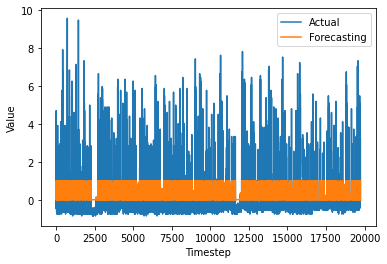

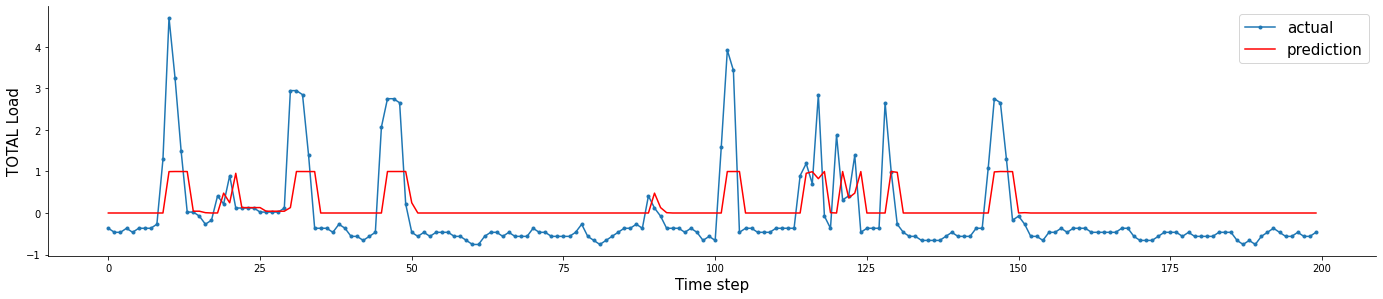

Epoch 1/50
198/198 [==============================] - 2s 4ms/step - loss: 1.0502 - val_loss: 0.9999
Epoch 2/50
198/198 [==============================] - 1s 4ms/step - loss: 0.9988 - val_loss: 0.9942
Epoch 3/50
198/198 [==============================] - 1s 4ms/step - loss: 0.9809 - val_loss: 0.9473
Epoch 4/50
198/198 [==============================] - 1s 3ms/step - loss: 0.9031 - val_loss: 0.8255
Epoch 5/50
198/198 [==============================] - 1s 3ms/step - loss: 0.7961 - val_loss: 0.7351
Epoch 6/50
198/198 [==============================] - 1s 3ms/step - loss: 0.7300 - val_loss: 0.7027
Epoch 7/50
198/198 [==============================] - 1s 3ms/step - loss: 0.7030 - val_loss: 0.6921
Epoch 8/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6990 - val_loss: 0.6880
Epoch 9/50
198/198 [==============================] - 1s 4ms/step - loss: 0.6947 - val_loss: 0.6871
Epoch 10/50
198/198 [==============================] - 1s 3ms/step - loss: 0.6919 - val_loss: 0.6877

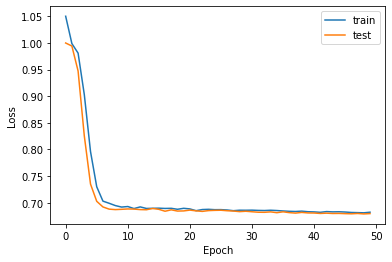

==============minmax===================
MAPE test is : 1.3609069760343806
MAPE test invert is : 0.761807701445786
==============zscore===================
MAPE test is : 2120.5568726811566
MAPE test invert is : 0.45783687712549065
RMSE Testing is : 0.824
RMSE Testing invert is : 84.521
R2 test is : 0.32036918776695733
R2 test invert is : 0.32036918776695744


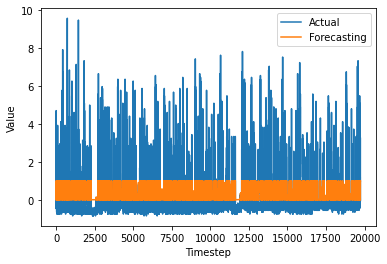

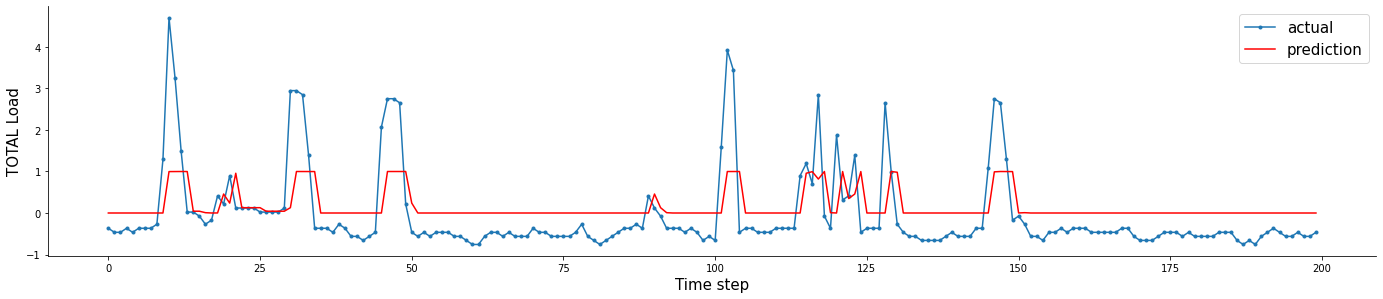

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto4
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network CNN
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=1, activation='sigmoid', input_shape=(train_X.shape[1], train_X.shape[2])))

  model.add(MaxPool1D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(32, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(32, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')




  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto4") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  # xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  # yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto4")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto4")